<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Assignment 2</strong></font></h1>

------------------------------------------------

HACKTIV8 - PYTHON FOR DATA SCIENCE
PYTN KS 019

------------------------------------------------

**Nama         : Nur Ishmawati**

**Kode Peserta : PYTN-KS19-08**


# __A. INTRODUCTION__
-----------------

Database ini (https://archive.ics.uci.edu/dataset/222/bank+marketing) memiliki 21 atribut. Data ini terkait dengan kampanye pemasaran langsung dari sebuah lembaga perbankan di Portugal. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan dilanggan ('ya') atau tidak ('tidak').

Metode pendekatan model statistik dan machine learning untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). Metode yang digunakan untuk memprekdiksi apakah klien akan berlangganan deposito berjangka dengan menggunakan data yang diambil di Australia adalah Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes.

Objektif yang ingin dicapai dari pemodelan pada assignment 3 ini adalah:

- Membuat pemodelan machine learning untuk memprekdiksi apakah klien akan berlangganan deposito berjangka menggunakan 6 model metode (Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes).
- Mengetahui model terbaik dari ke 6 model yang dibuat.

# __B. IMPORT LIBRARY__
----------------------------

In [1]:
# Import Library Dataframe
import pandas as pd
import numpy as np

# Import Library untuk Visualisasi
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# Import Library untuk Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
import missingno as msno

# Import Library untuk Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# Import Library untuk ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# C. DATA LOADING
-------------------

## 1. Memanggil Dataset

In [2]:
df_train = pd.read_csv('bank-additional-full.csv', sep=';')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

# Melihat 5 data paling atas
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_test = pd.read_csv('bank-additional.csv', sep=';')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

# Melihat 5 data paling atas
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


- Karena data bank-additional-full.csv merupakan data terbaru maka analisis dan modelling dilakukan menggunakan data pada bank-additional-full.csv sebagai data untuk training model.

- Sementara itu data sampel acak sebesar 10% yaitu bank-additional.cvs akan digunakan sebagai data testing.

## 2. Melihat Jumlah Baris & Kolom

In [4]:
df_train.shape

(41188, 21)

Dataset ini terdiri dari 21 atribut yang memiliki 41,188 baris.

In [5]:
df_test.shape

(4119, 21)

Dataset ini terdiri dari 21 atribut yang memiliki 4,119 baris.

## 3. Melihat Info dan Tipe Data 

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [8]:
# Mengecek tipe data
df_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
# Mengecek tipe data
df_test.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Kedua dataset ini terdiri dari 21 atribut dimana tersusun dari ``tipe data float, integer, dan object``.

In [10]:
# Melihat data unik
df_train.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [11]:
# Melihat data unik
df_test.nunique().sort_values(ascending=True)

y                   2
contact             2
default             3
housing             3
loan                3
poutcome            3
marital             4
day_of_week         5
previous            7
education           8
emp.var.rate       10
month              10
nr.employed        11
job                12
pdays              21
campaign           25
cons.price.idx     26
cons.conf.idx      26
age                67
euribor3m         234
duration          828
dtype: int64

## 4. Melihat Data Kategorik dan Numerik

In [12]:
# Mengecek kolom kategori
categorical_col = [col for col in df_train.columns if df_train[col].dtypes =='O']

print('Terdapat {} kolom kategorik'.format(len(categorical_col)))
print('Kolom kategorik tersebut yaitu:', categorical_col)

Terdapat 11 kolom kategorik
Kolom kategorik tersebut yaitu: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [13]:
# Mengecek kolom numerik
numerical_col = [col for col in df_train.columns if df_train[col].dtypes !='O']

print('Terdapat {} kolom numerik'.format(len(numerical_col)))
print('Kolom numerik tersebut yaitu:', numerical_col)

Terdapat 10 kolom numerik
Kolom numerik tersebut yaitu: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# D. DATA CLEANING
------------------------
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.


## 1. Mengecek Missing Value
    Mengecek missing value pada setiap kolom

In [14]:
#Mengecek apakah terdapat missing value
df_train.isnull().values.any()    

False

In [15]:
#Mengecek apakah terdapat missing value
df_test.isnull().values.any()    

False

In [16]:
# Memeriksa kolom yang terdapat missing value
df_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
# Memeriksa kolom yang terdapat missing value
df_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
# Menghitung nilai null pada dataset
df_train.isnull().sum().sum()

0

In [19]:
# Menghitung nilai null pada dataset
df_test.isnull().sum().sum()

0

Ternyata kedua dataset tidak mengadung/terdapat nilai yang missing value.

## 2. Mengecek Duplicate Data


In [20]:
# Melihat duplicate data pada dataset
df_train.duplicated().sum()

12

Pada dataset yang menjadi data training terdapat duplicate data sebanya 12 baris

In [21]:
# Menghapus baris duplikat
df_train = df_train.drop_duplicates(keep='first')

In [22]:
# Mengecek kembali masih apakah masih ada duplicate data pada dataset
df_train.duplicated().sum()

0

In [23]:
# Melihat duplicate data pada dataset
df_test.duplicated().sum()

0

## 3. Melihat Distribusi Kolom Numerik

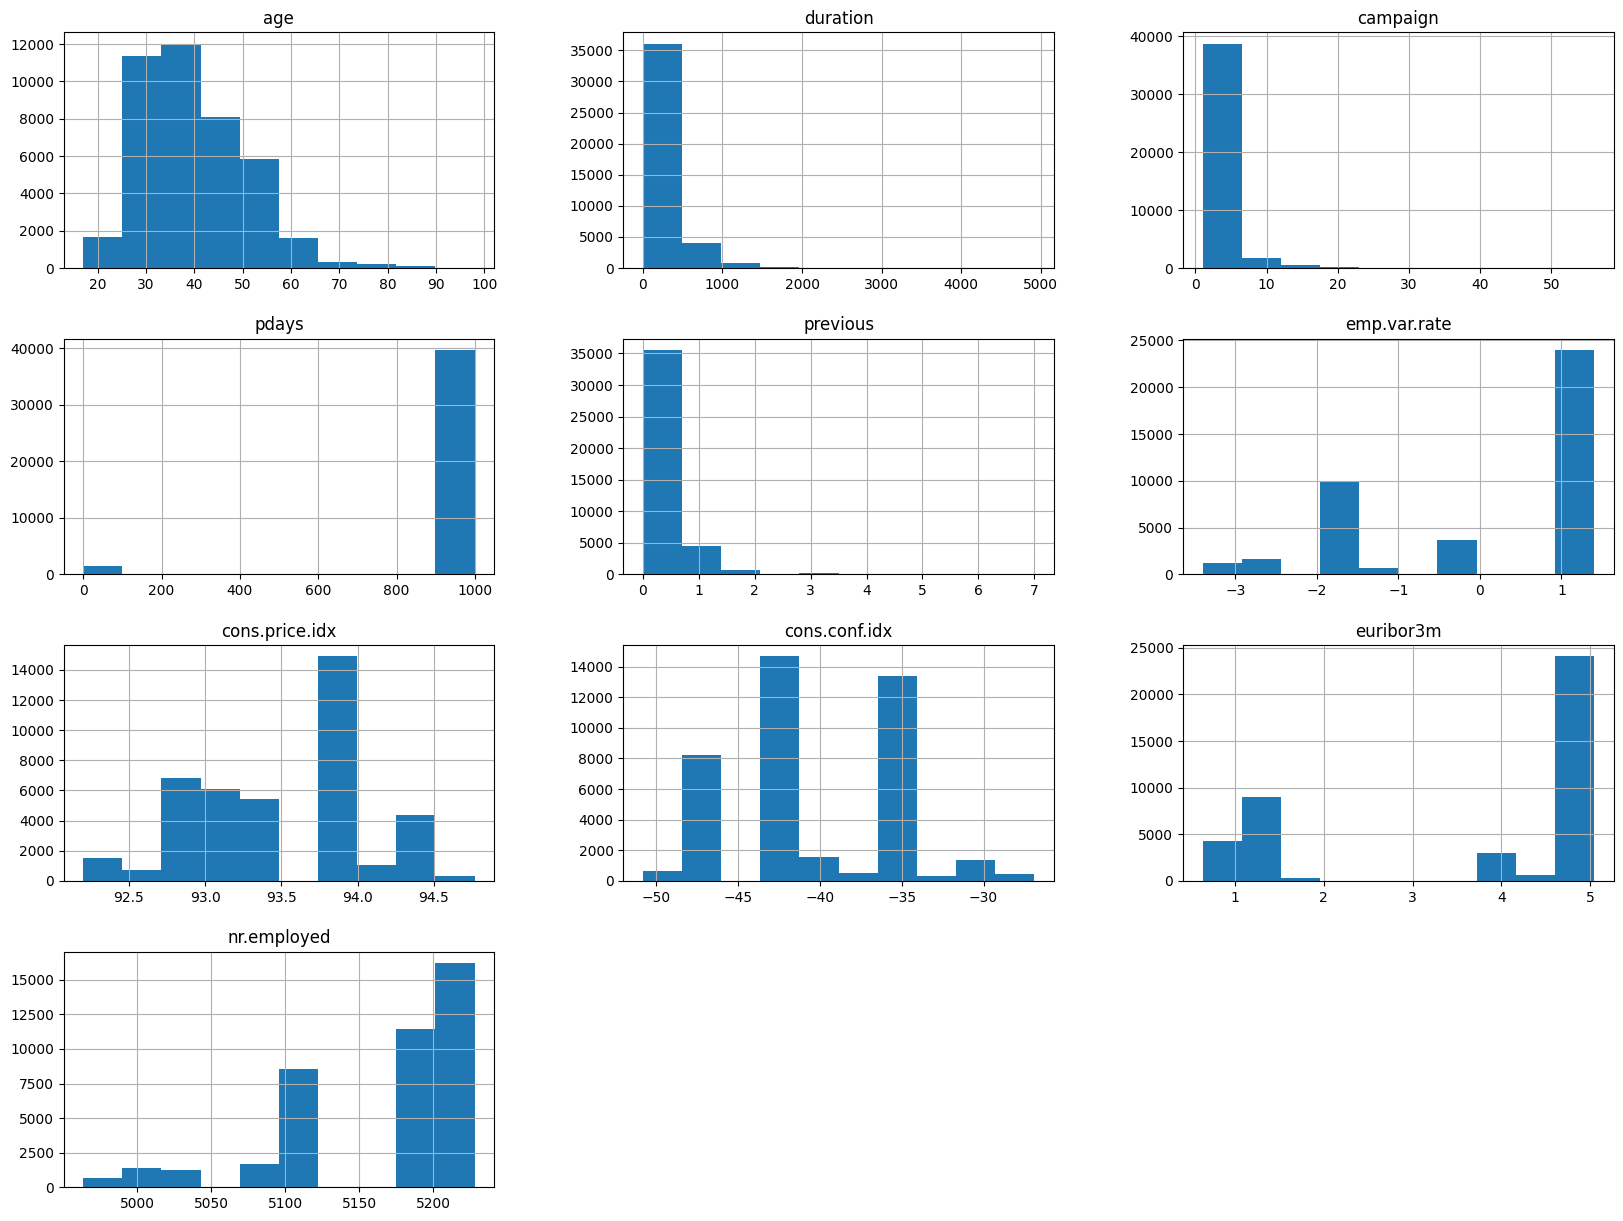

In [24]:
# Menampilkan visualisasi distribusi dari kolom numerik
df_train.hist(figsize=(20,15));
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Berdasarkan visualisasi di atas terlihat bahwa data pada tipe numerik tidak berdistribusi normal dan beberapa terdapat skewness.

## 4. Mengecek Outlier Kolom Numerik

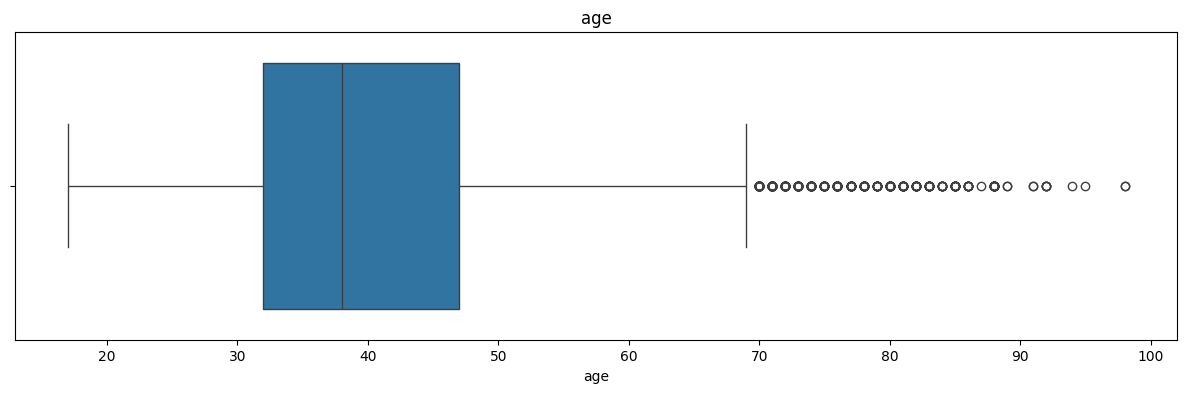

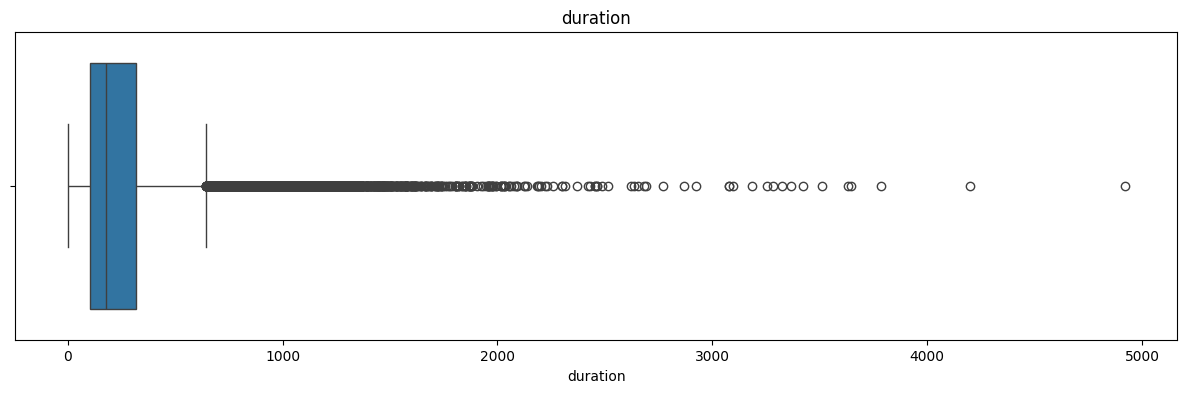

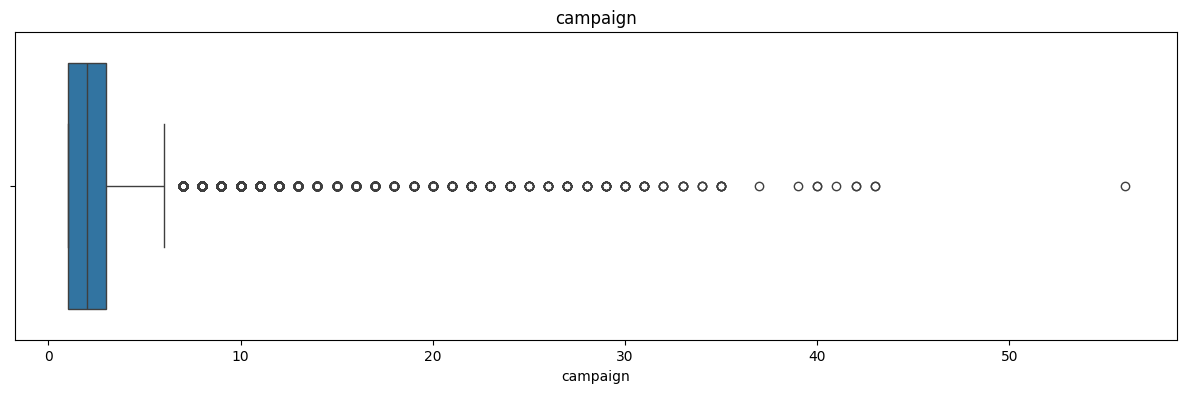

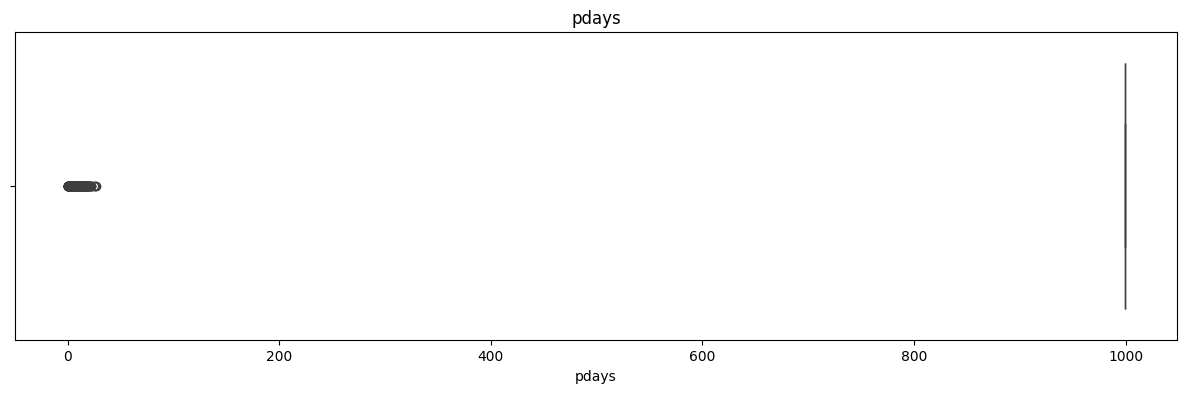

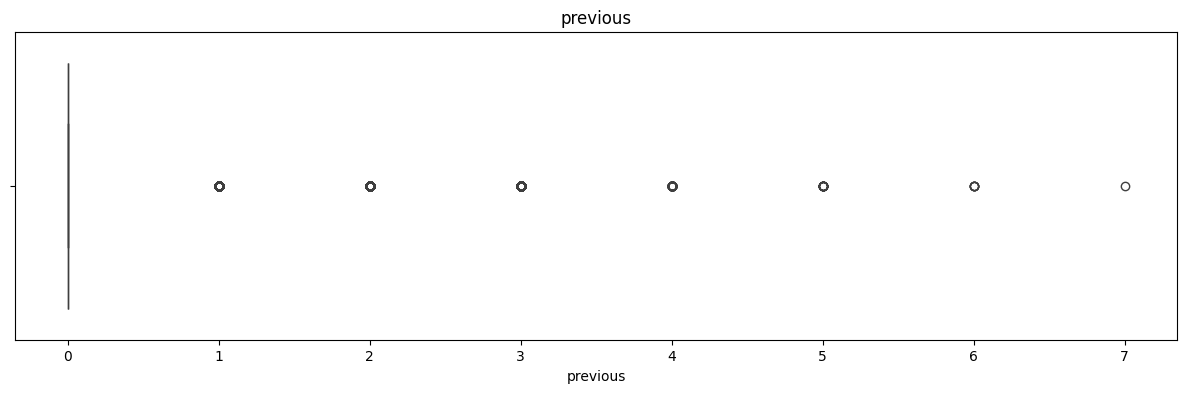

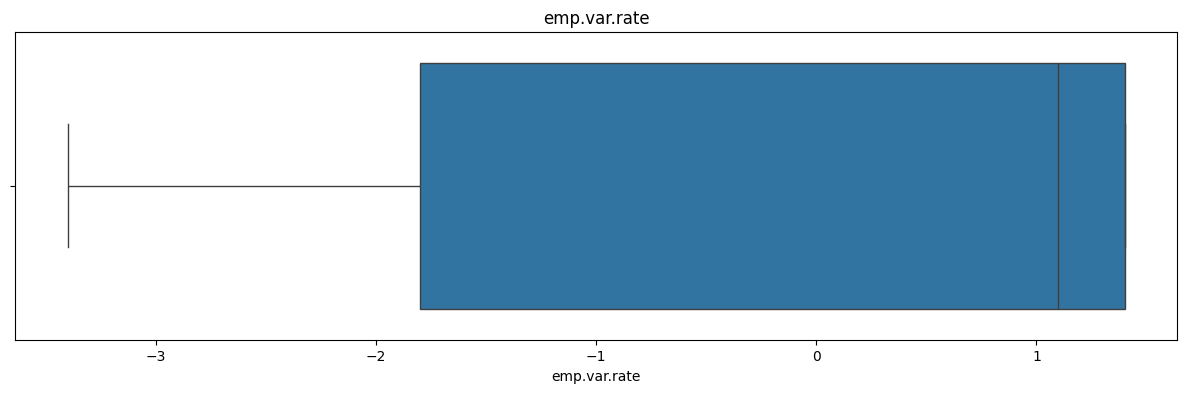

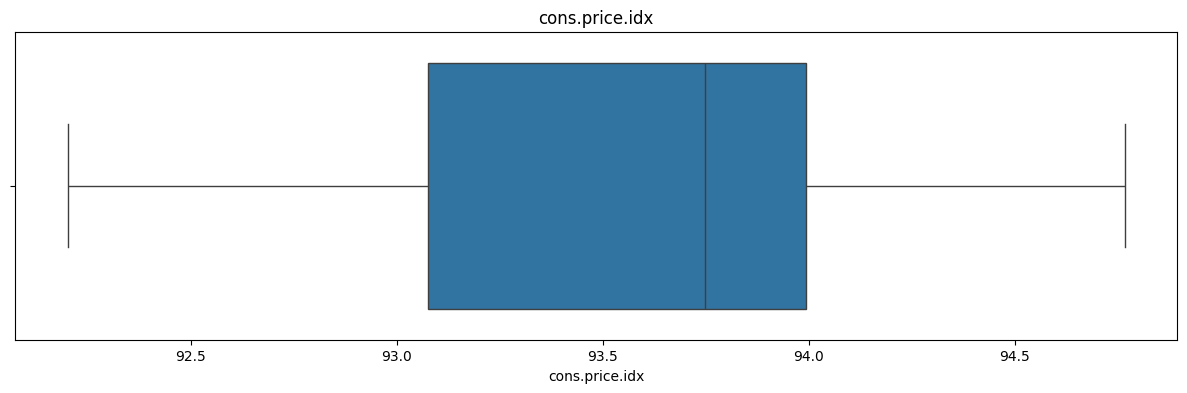

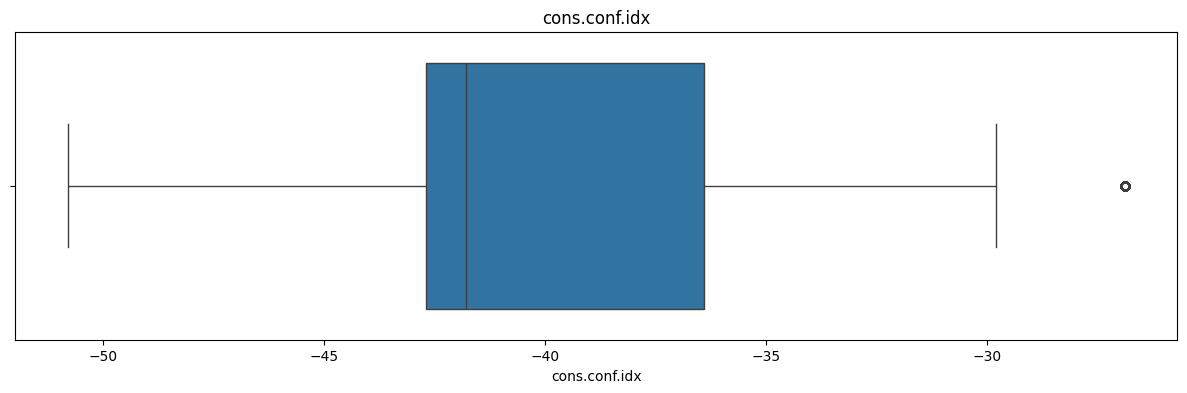

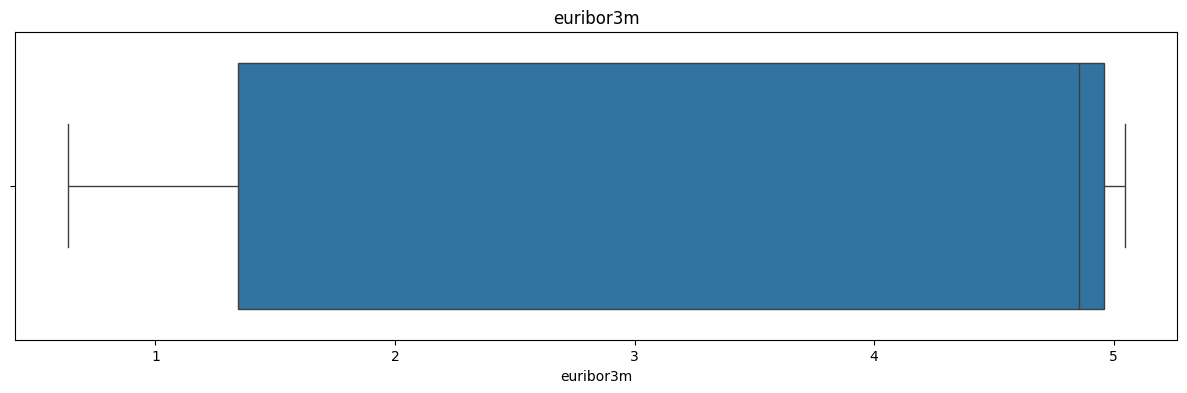

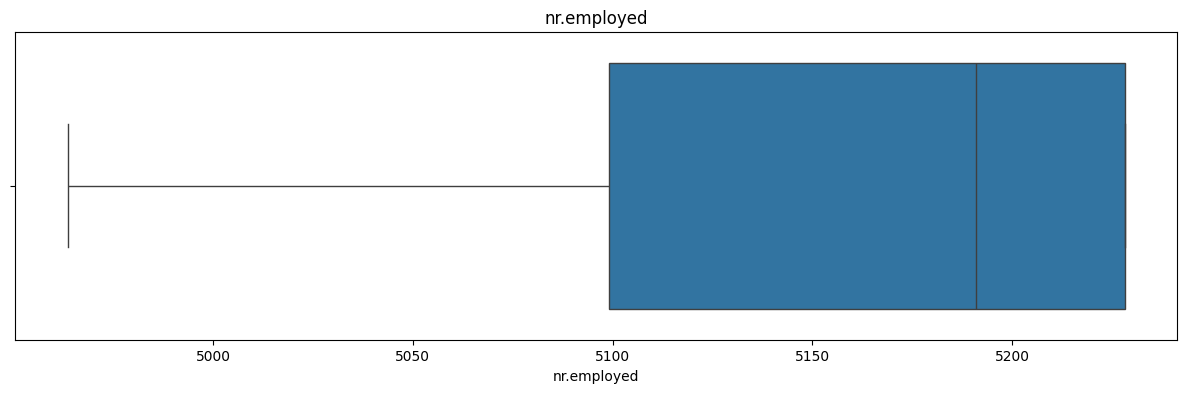

In [25]:
# Megecek outlier menggunakan boxplot
for i in df_train[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df_train[numerical_col][i])

Terlihat melalui visualisasi boxplot masih terdapat outlier pada kolom-kolom numerik.

In [26]:
# Membuat list untuk kolom yang memiliki outliers
outlier_col = ['age','duration','campaign','pdays','previous','cons.conf.idx']

# Handling outlier
for col in outlier_col:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    df_train.loc[df_train[col] < lower_boundary,col] = lower_boundary
    df_train.loc[df_train[col] > upper_boundary,col] = upper_boundary

In [27]:
# Lower Limit
Q1 = df_train[outlier_col].quantile(0.25)
# Upper Limit
Q3 = df_train[outlier_col].quantile(0.75)

IQR = Q3-Q1

# Lower Limit
low_limit = pd.DataFrame({"Lower Limit": Q1 - 1.5*IQR})
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":Q3 + 1.5*IQR})

# apply into dataframe
dt_quartile = pd.concat([up_limit, low_limit], axis=1)
dt_quartile

,Upper Limit,Lower Limit
age,69.50,9.50
duration,644.50,-223.50
campaign,6.00,-2.00
pdays,999.00,999.00
previous,0.00,0.00
cons.conf.idx,-26.95,-52.15


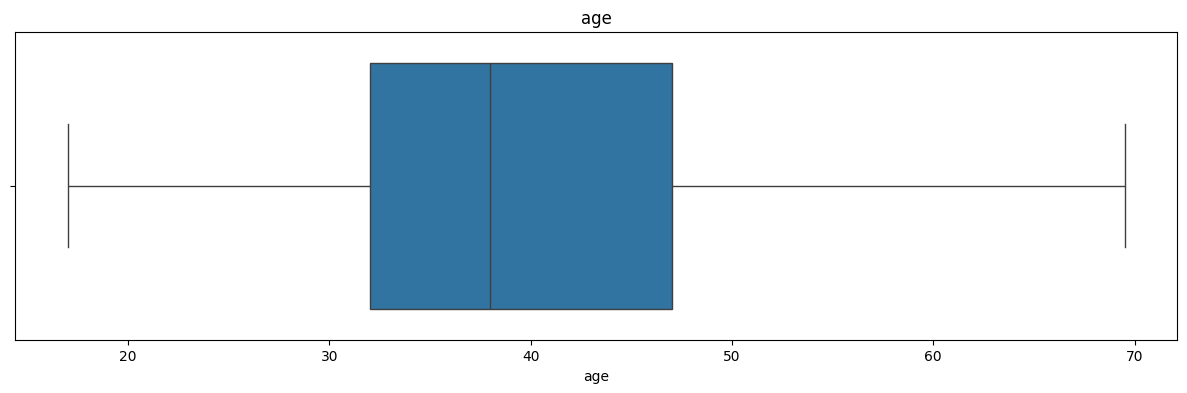

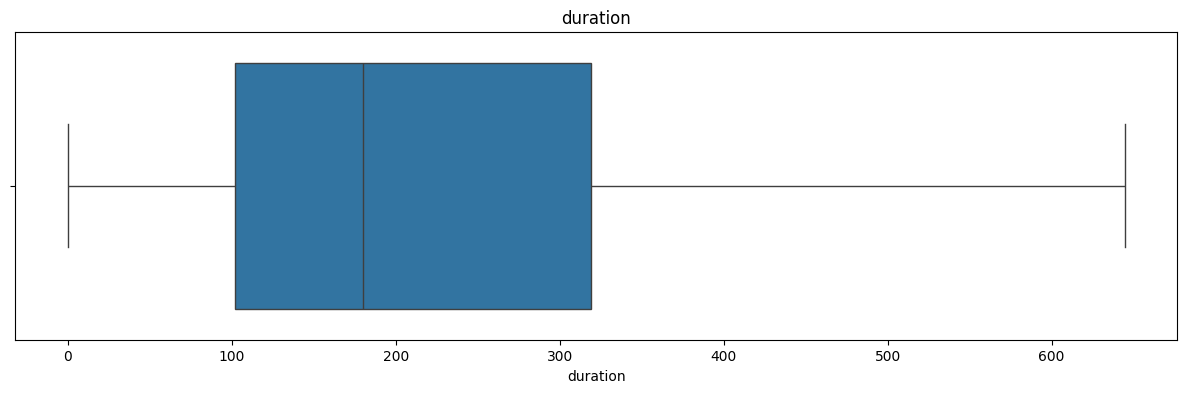

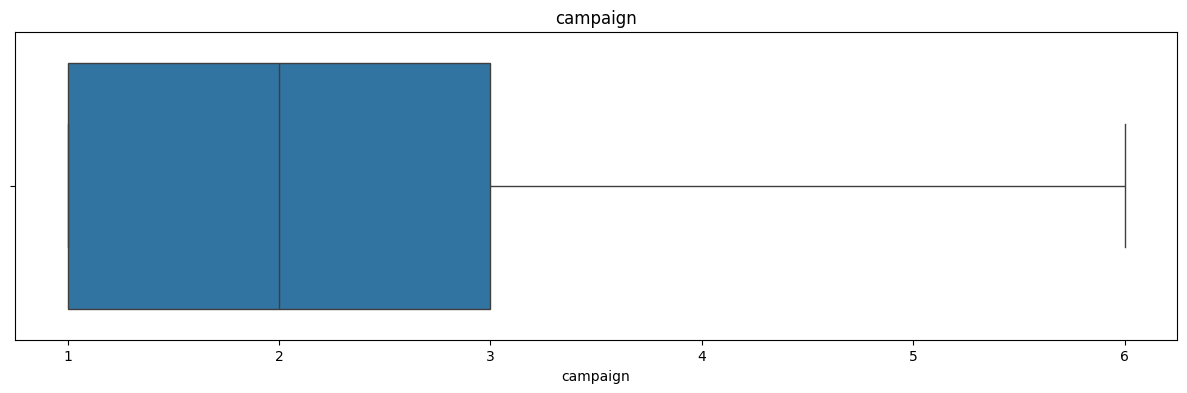

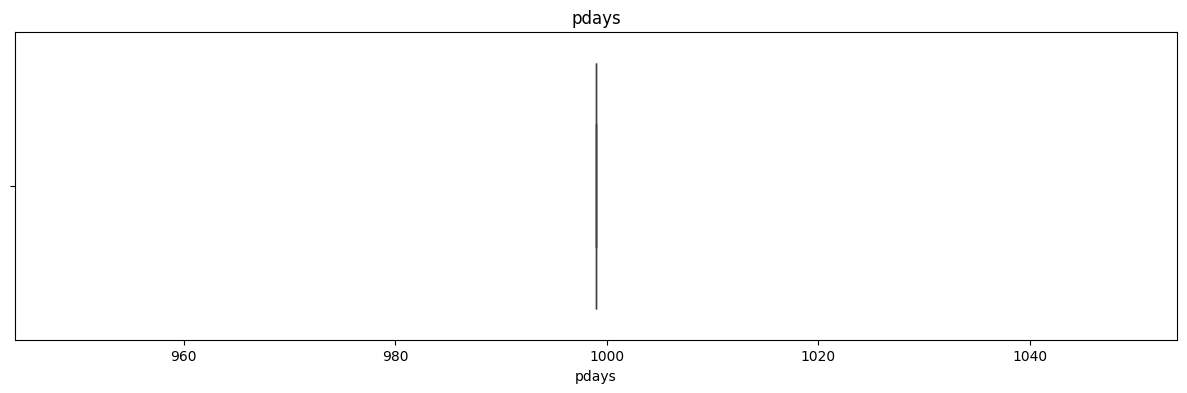

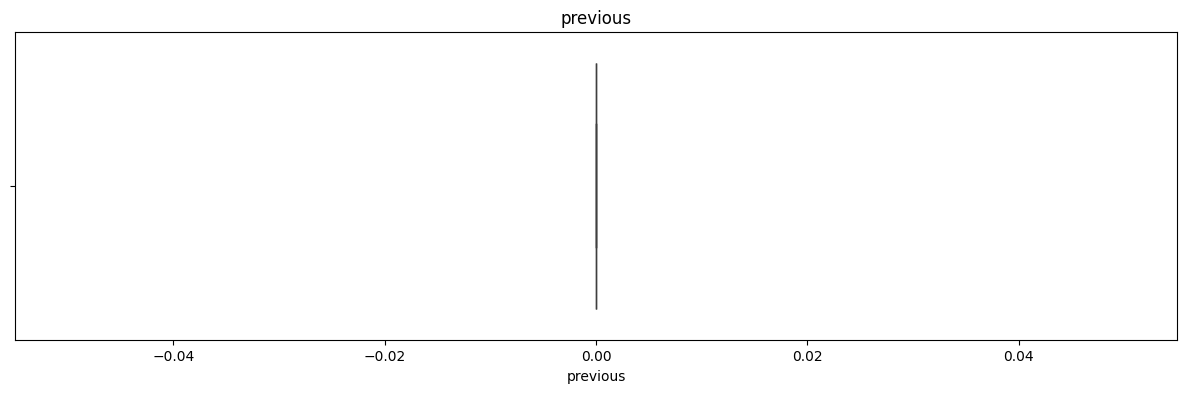

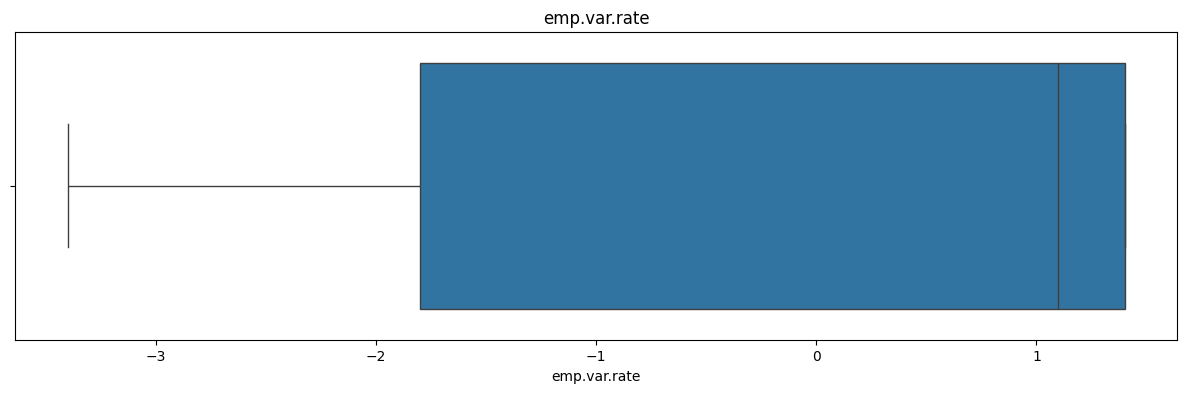

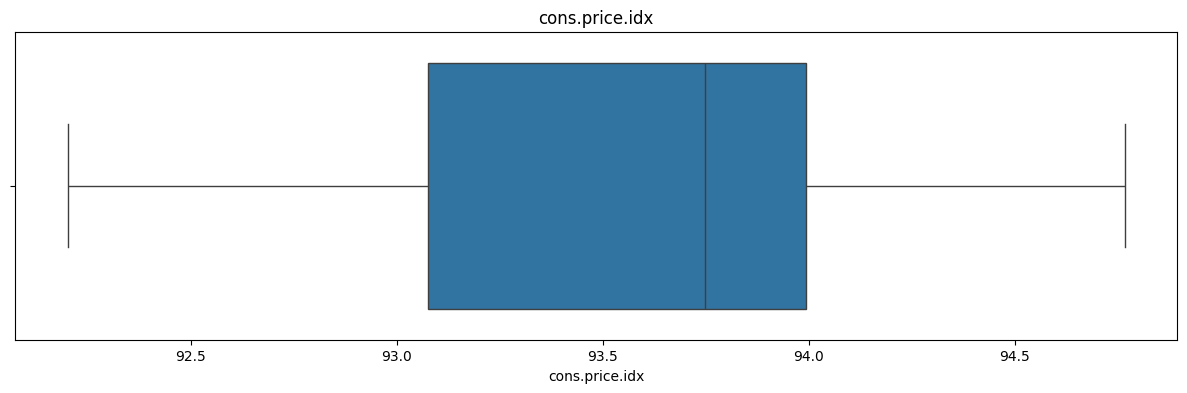

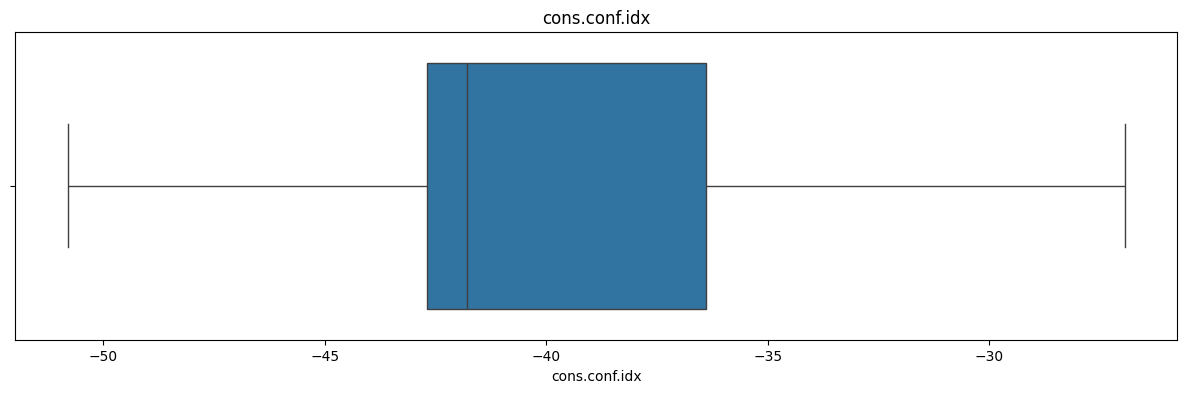

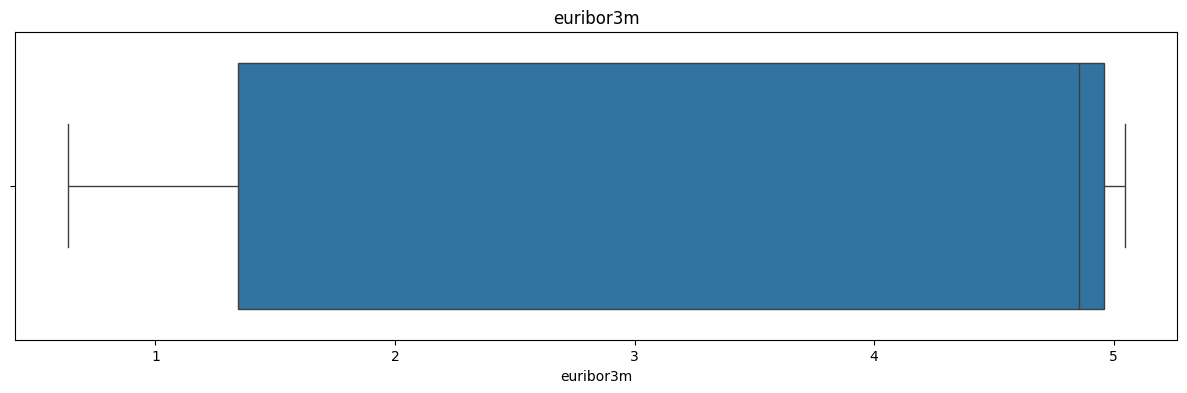

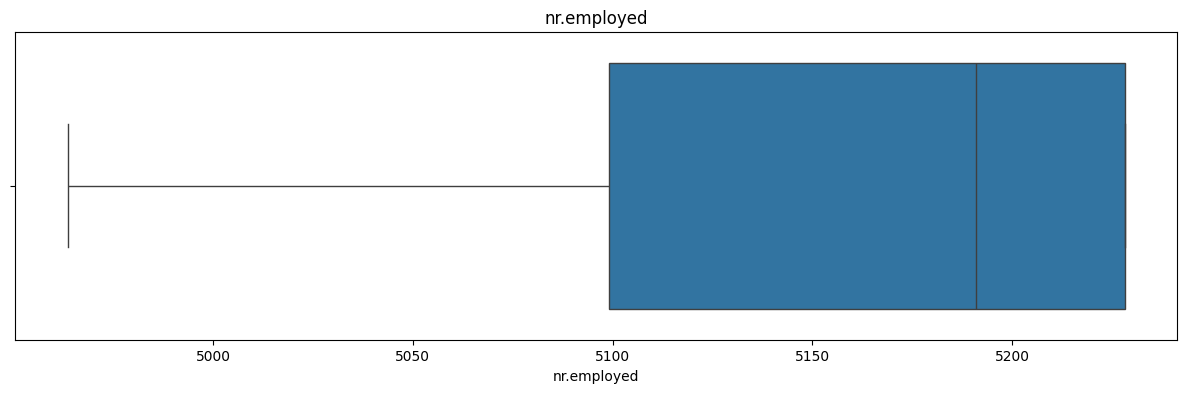

In [28]:
# Megecek kembali outlier menggunakan boxplot
for i in df_train[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df_train[numerical_col][i])

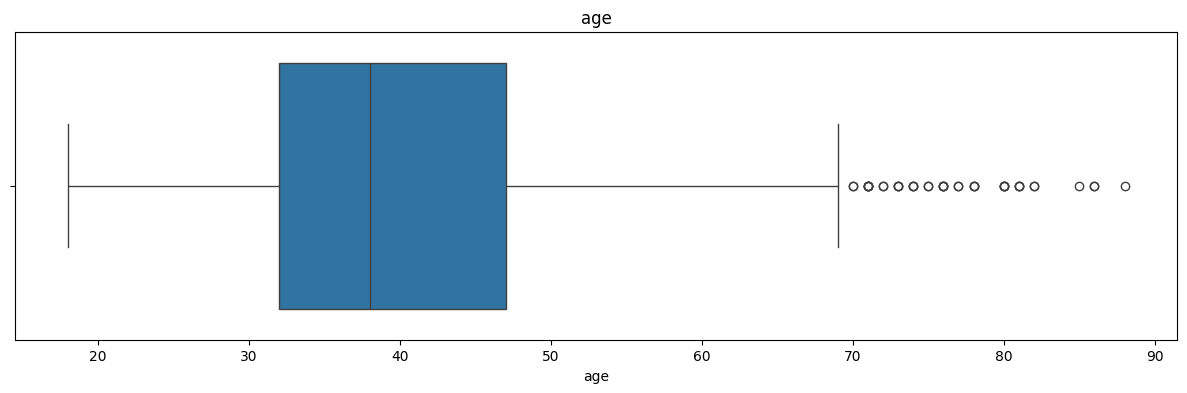

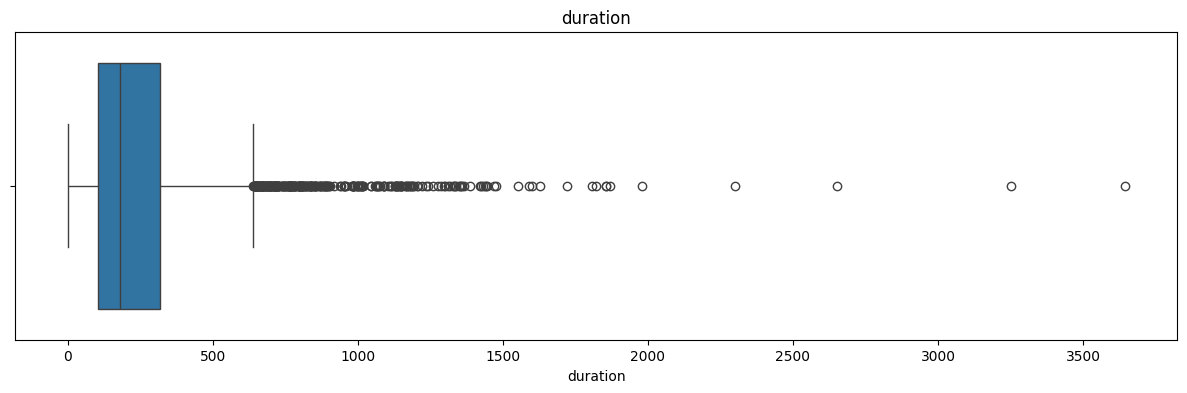

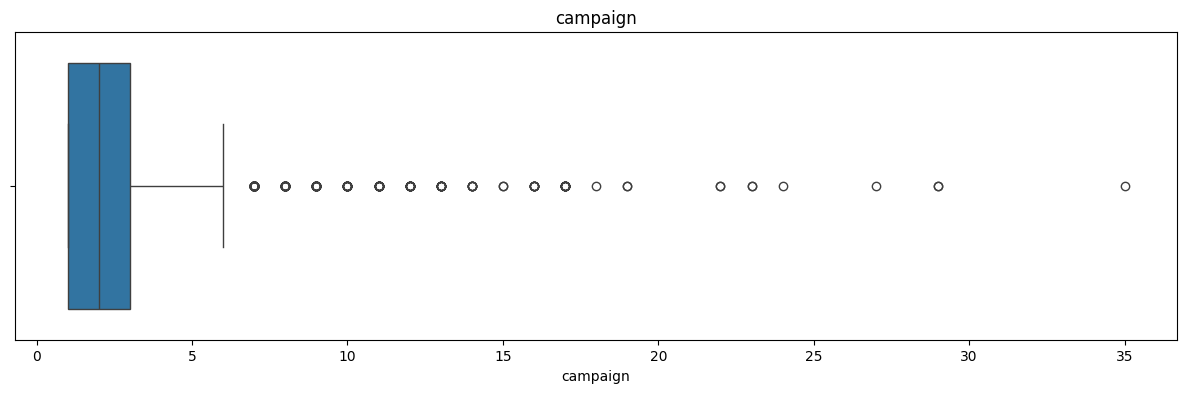

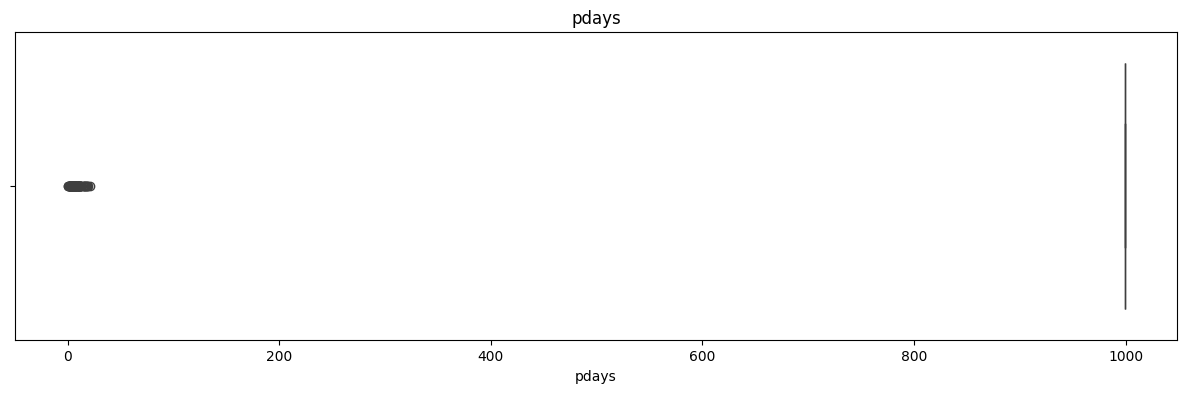

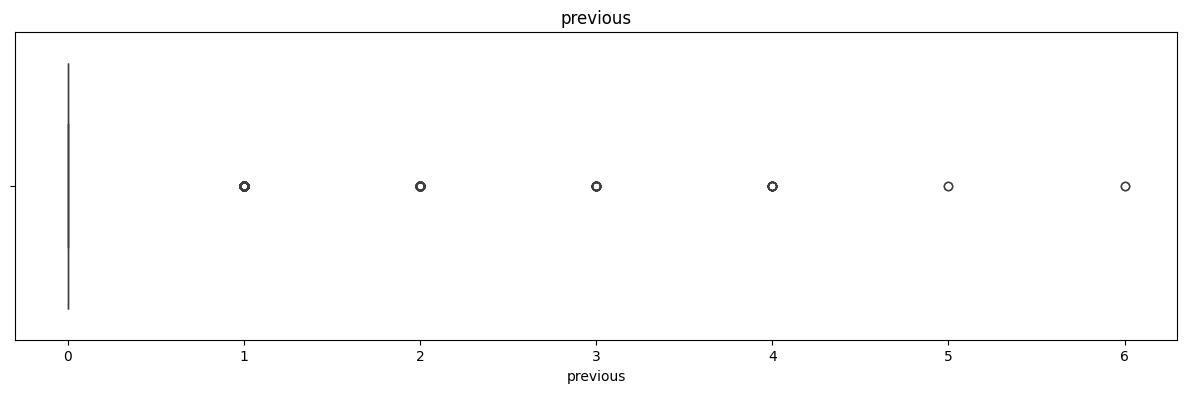

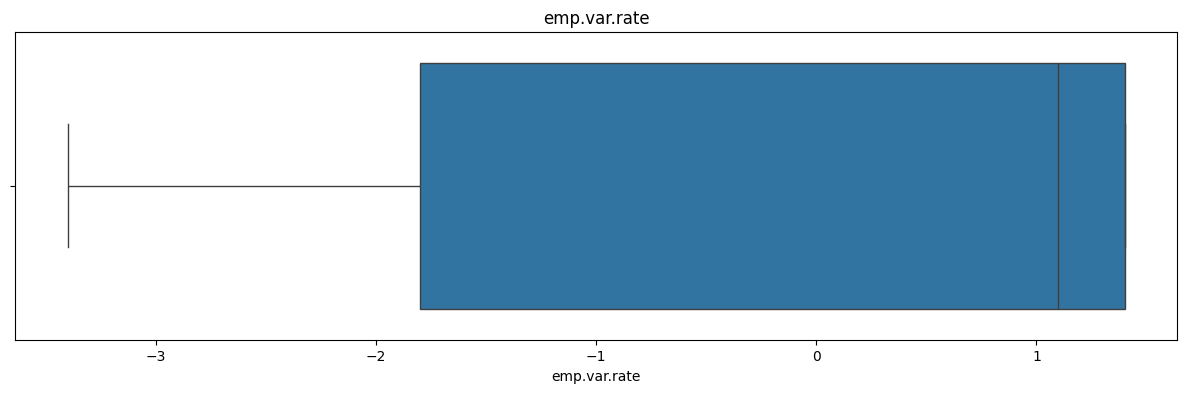

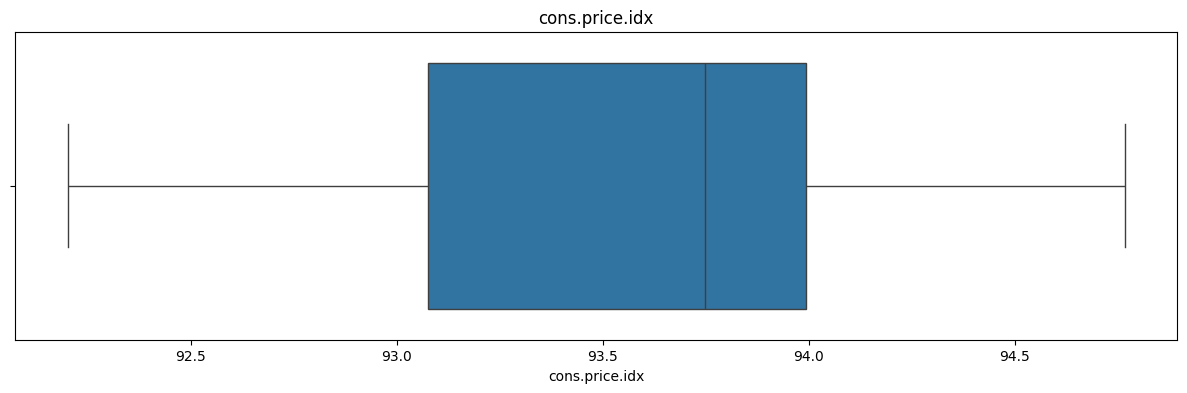

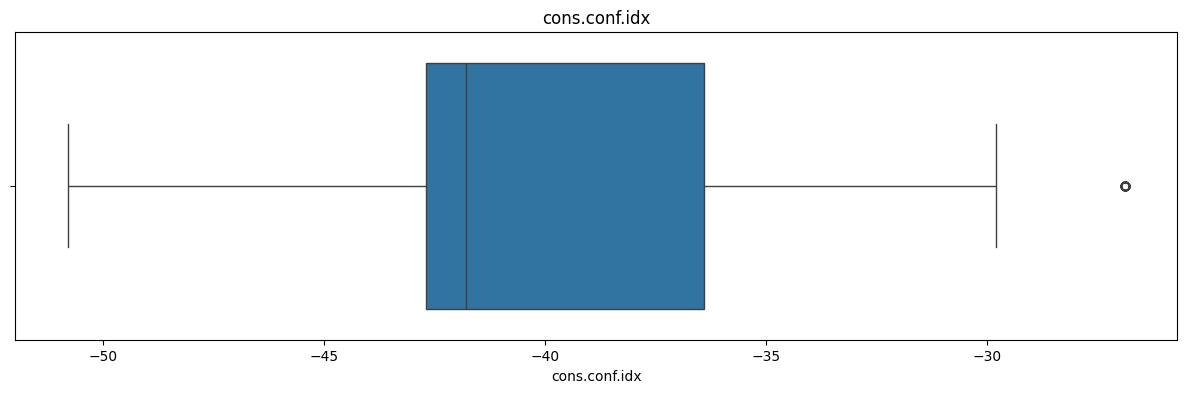

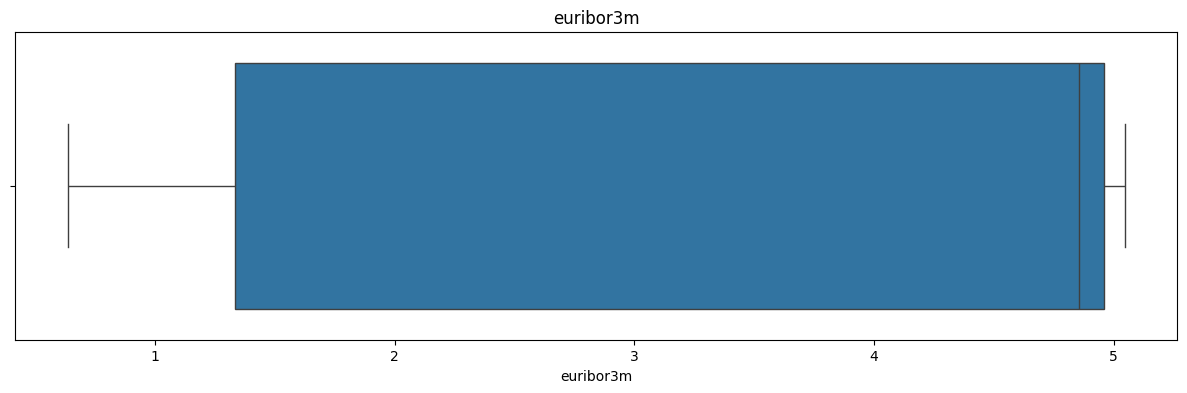

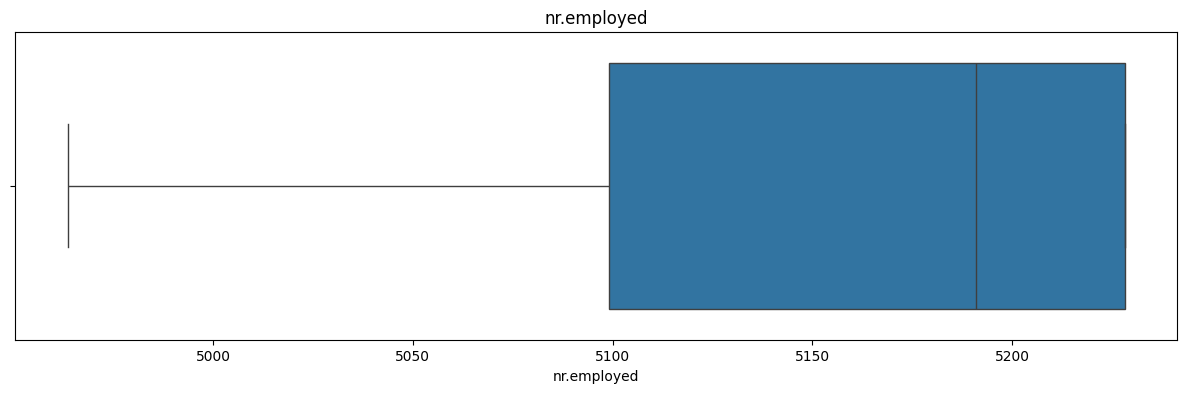

In [29]:
# Megecek outlier menggunakan boxplot
for i in df_test[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df_test[numerical_col][i])

In [30]:
# Membuat list untuk kolom yang memiliki outliers
outlier_col = ['age','duration','campaign','pdays','previous','cons.conf.idx']

# Handling outlier
for col in outlier_col:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    df_test.loc[df_test[col] < lower_boundary,col] = lower_boundary
    df_test.loc[df_test[col] > upper_boundary,col] = upper_boundary

In [31]:
# Lower Limit
Q1 = df_test[outlier_col].quantile(0.25)
# Upper Limit
Q3 = df_test[outlier_col].quantile(0.75)

IQR = Q3-Q1

# Lower Limit
low_limit = pd.DataFrame({"Lower Limit": Q1 - 1.5*IQR})
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit": Q3 + 1.5*IQR})

# apply into dataframe
dt_quartile = pd.concat([up_limit, low_limit], axis=1)
dt_quartile

,Upper Limit,Lower Limit
age,69.50,9.50
duration,638.00,-218.00
campaign,6.00,-2.00
pdays,999.00,999.00
previous,0.00,0.00
cons.conf.idx,-26.95,-52.15


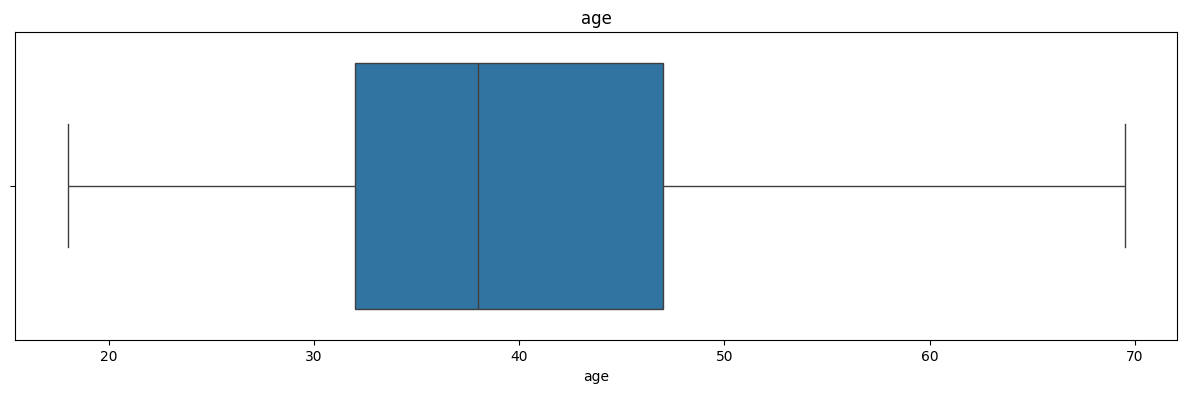

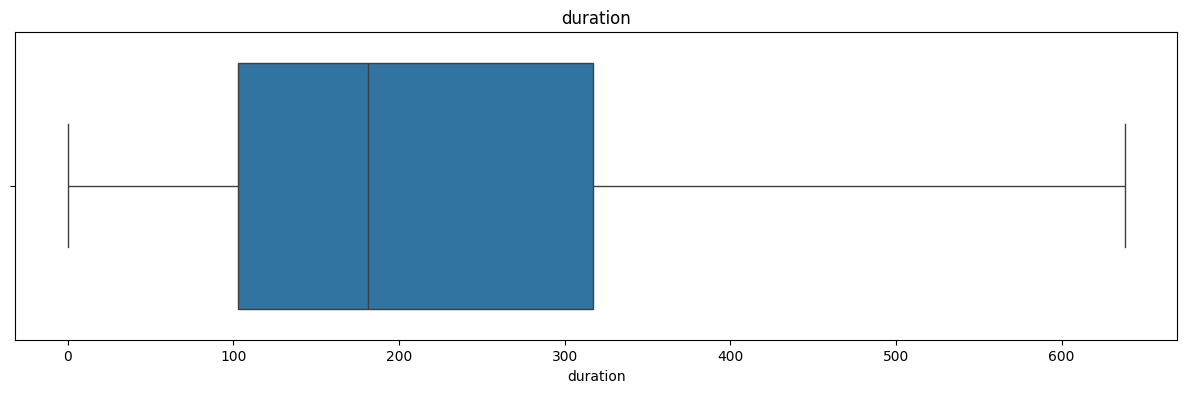

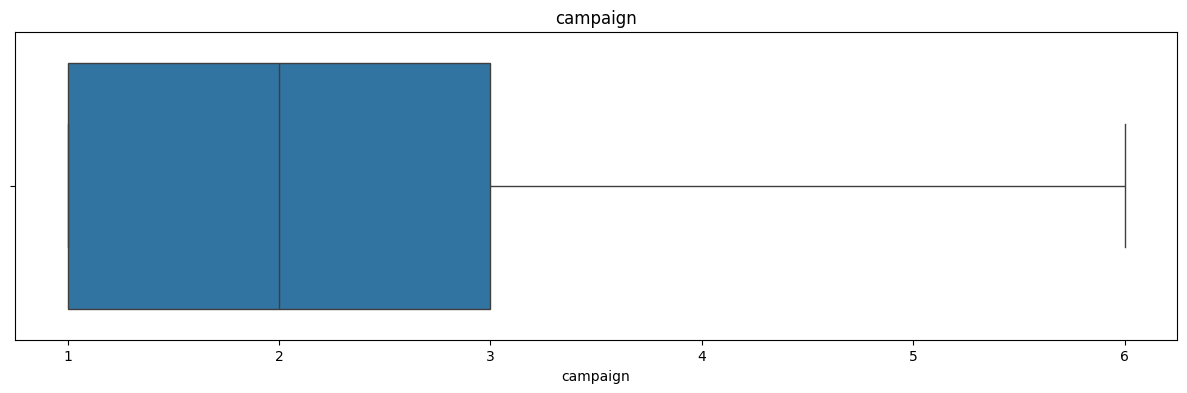

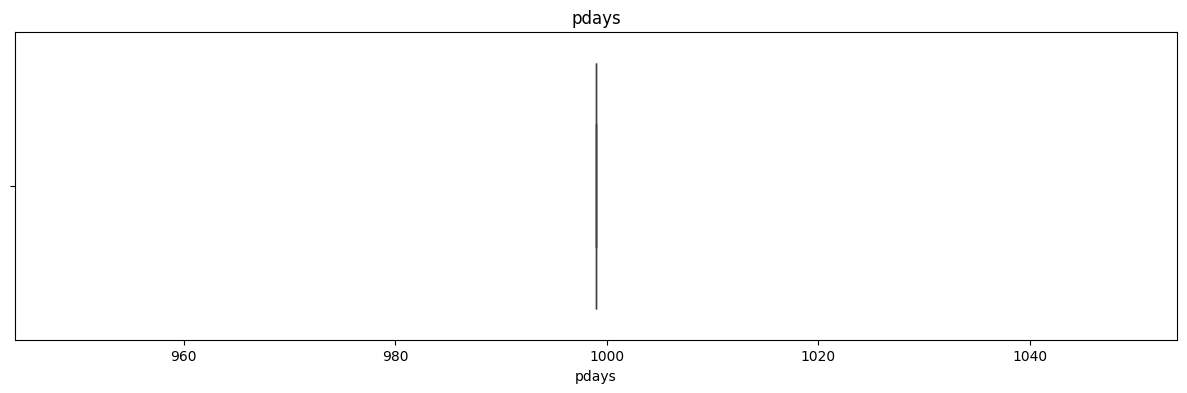

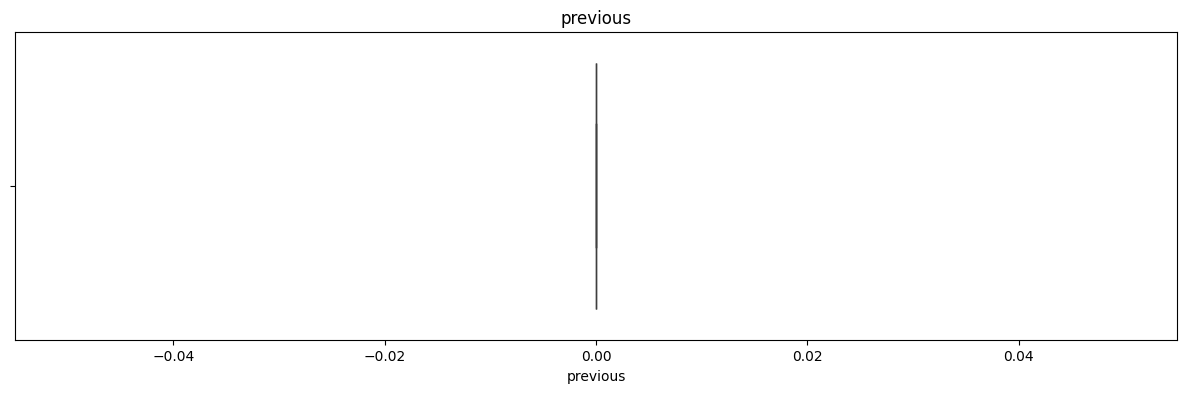

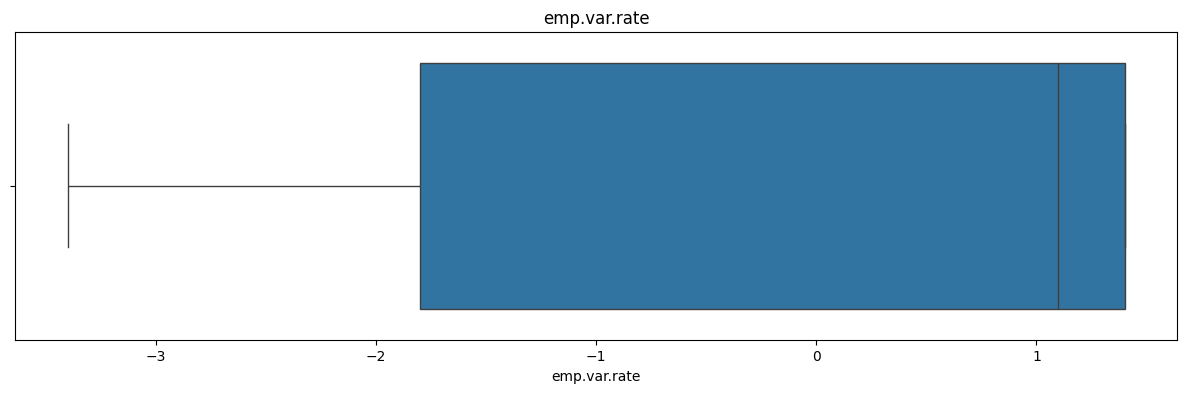

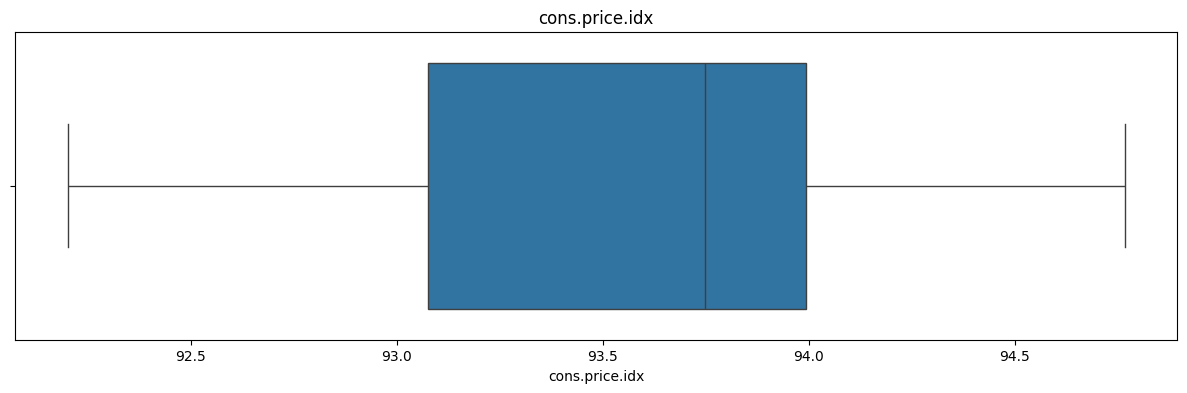

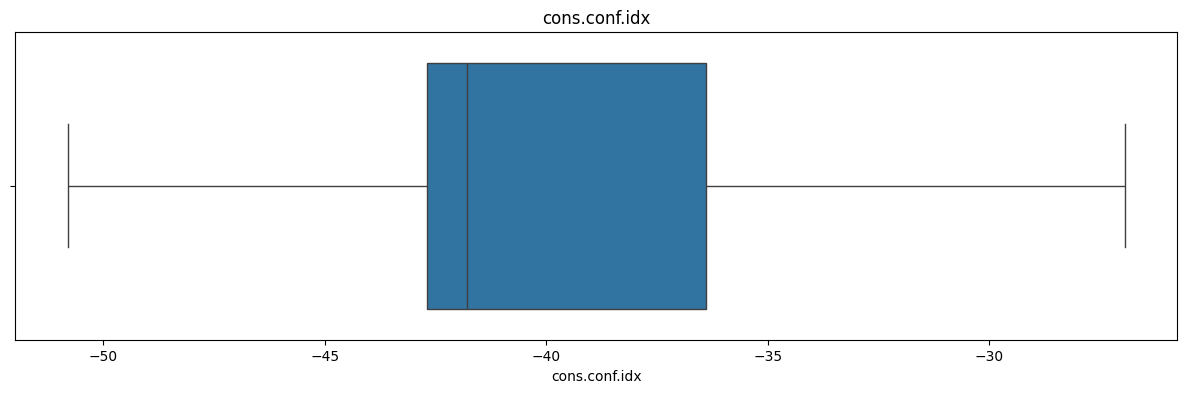

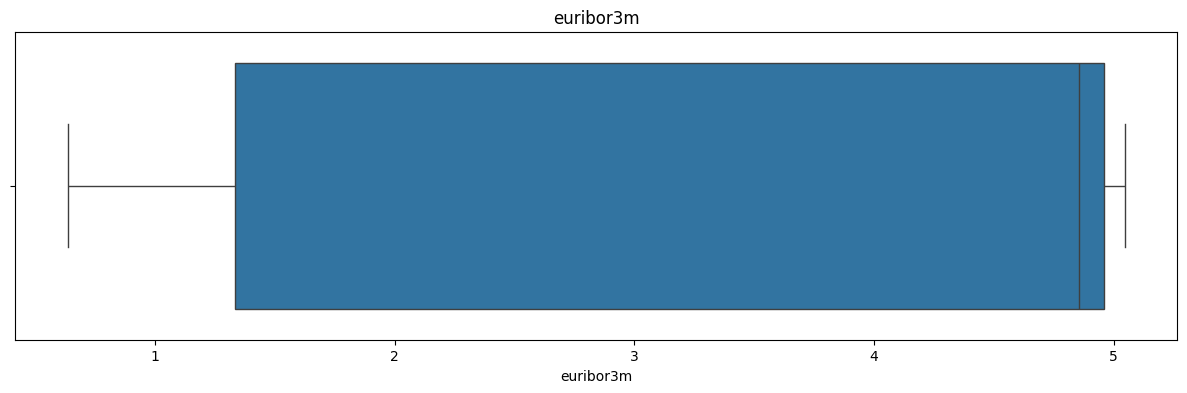

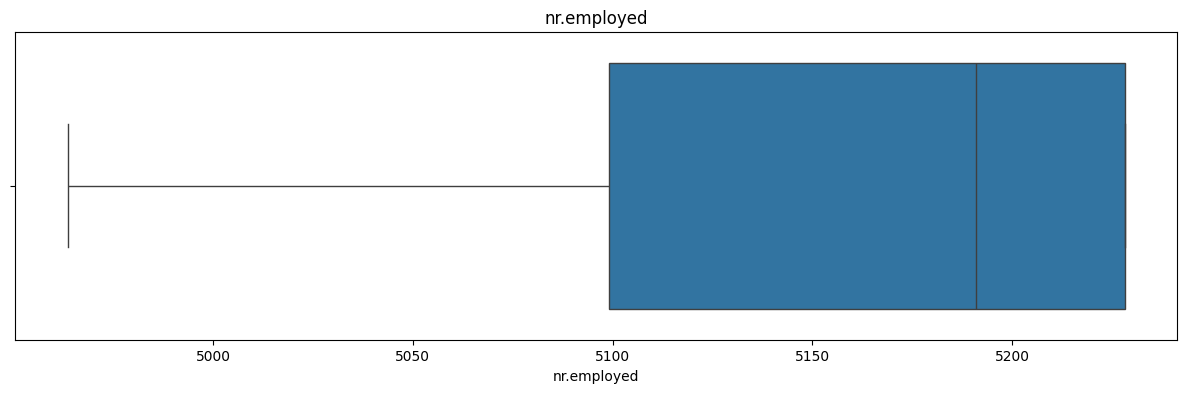

In [32]:
# Megecek kembali outlier menggunakan boxplot
for i in df_test[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df_test[numerical_col][i])

# __E. EXPLORATORY DATA ANALYSIS (EDA)__
----------------------------
    Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 1. Melihat Describe Data

In [33]:
df_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.0,41176.0,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.939236,235.021335,2.275476,999.0,0.0,0.081922,93.575720,-40.503405,3.621293,5167.034870
std,10.128801,177.365635,1.550606,0.0,0.0,1.570883,0.578839,4.626271,1.734437,72.251364
min,17.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.500000,644.500000,6.000000,999.0,0.0,1.400000,94.767000,-26.950000,5.045000,5228.100000


In [34]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442.0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


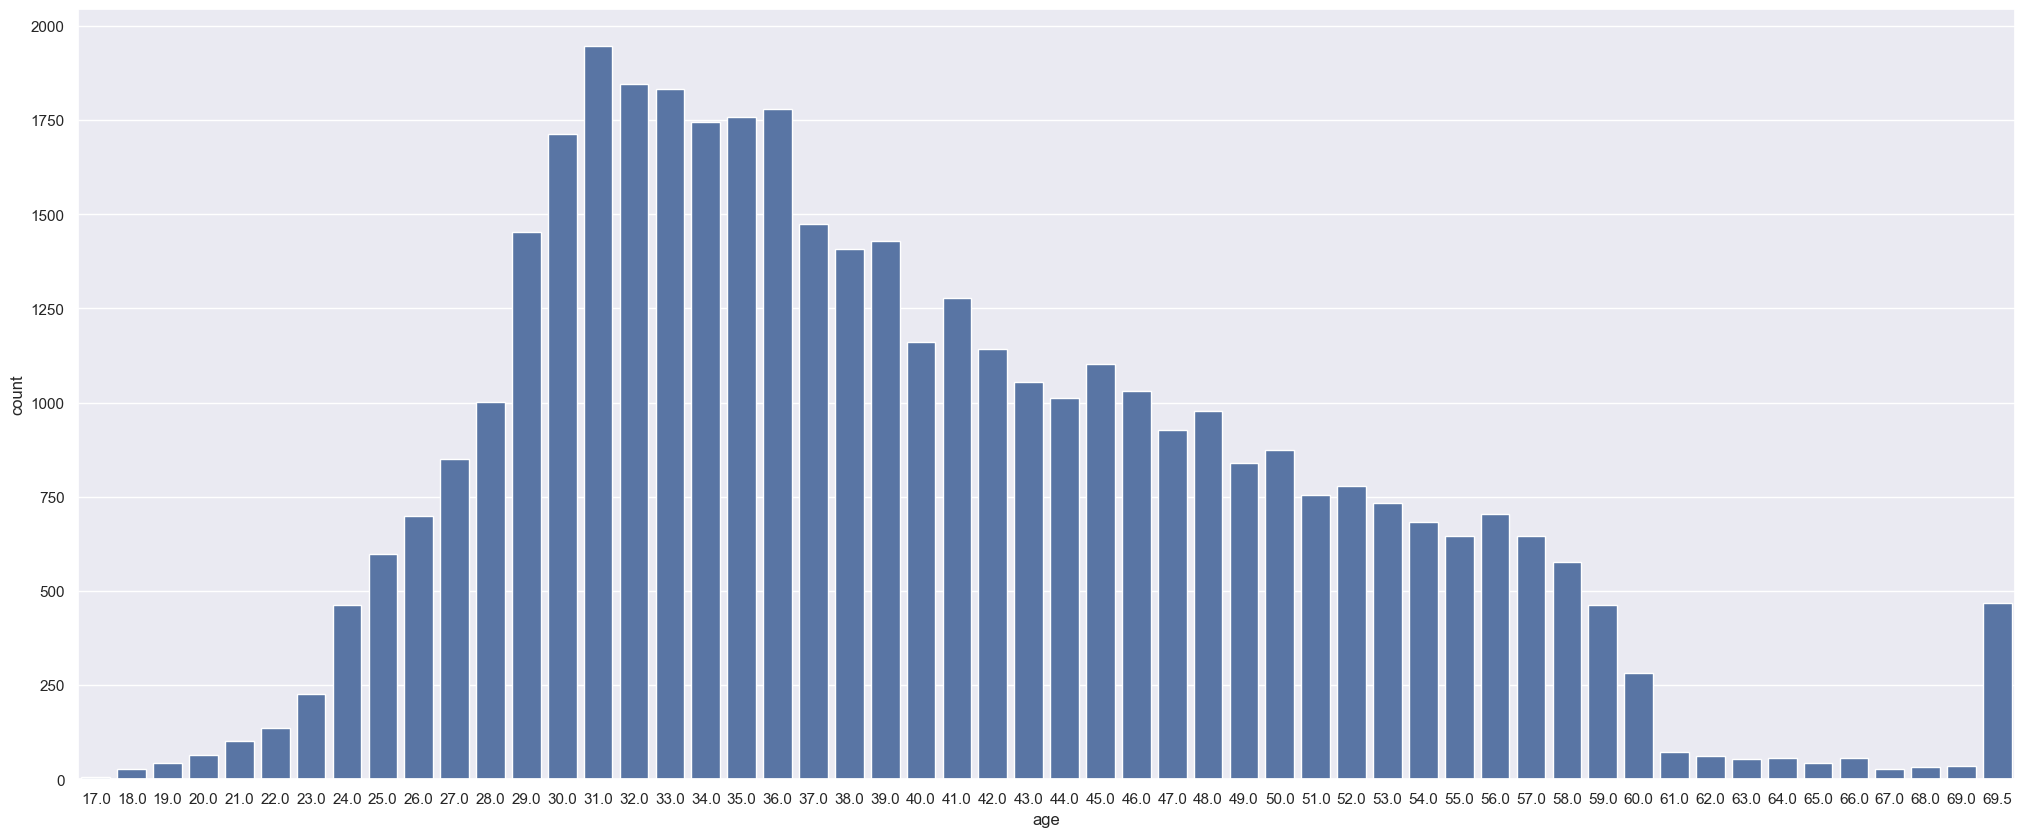

In [35]:
sns.set(rc={'figure.figsize':(25,10)})
sns.countplot(x='age', data=df_train)
plt.show()

Berdasarkan record data, dari feature age sendiri didominasi tertinggi dari yang berumur 31 kemudian diurutan ke 2 yang berusia 32 tahun. Sedangkan untuk paling sedikitnya ada di umur 18 dan 67.

job
admin.           25.303575
blue-collar      22.471828
technician       16.366330
services          9.634253
management        7.101224
retired           4.172333
entrepreneur      3.536040
self-employed     3.451039
housemaid         2.574315
unemployed        2.462600
student           2.125024
unknown           0.801438
Name: proportion, dtype: float64

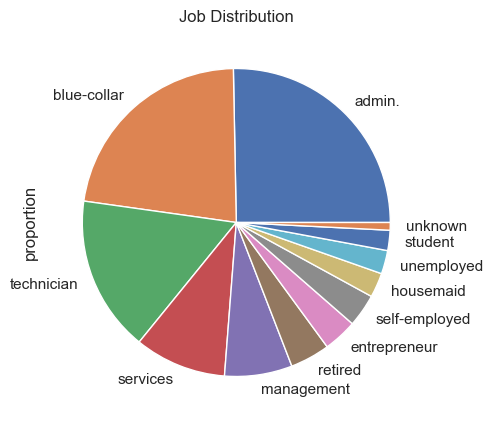

In [36]:
# Visualisasi job menggunakan Pie Chart
sns.set(rc={'figure.figsize':(5,5)})
display(df_train.job.value_counts(normalize = True)*100)
df_train.job.value_counts(normalize = True).plot(kind = 'pie')

plt.title('Job Distribution')
plt.show()

Berdasarkan record data, dari feature job sendiri didominasi tertinggi dari pekerjaan admin mencapai 1/4 data atau persentasenya sebesar 25.30% kemudian diurutan ke 2 adalah blue-collar sekitar 22.47%. Sedangkan untuk paling sedikitnya pekerjaan yang unknow sebesar 0.80%.

marital
married     60.523120
single      28.084321
divorced    11.198271
unknown      0.194288
Name: proportion, dtype: float64

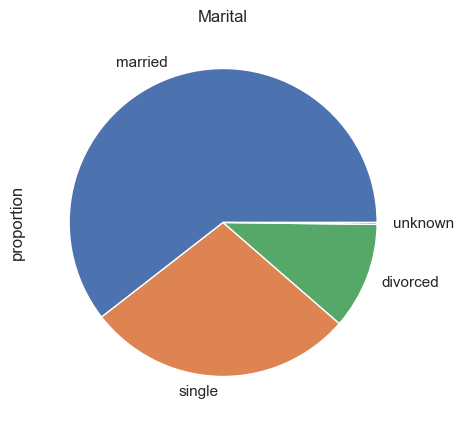

In [37]:
# Visualisasi marital menggunakan Pie Chart
sns.set(rc={'figure.figsize':(5,5)})
display(df_train.marital.value_counts(normalize = True)*100)
df_train.marital.value_counts(normalize = True).plot(kind = 'pie')

plt.title('Marital')
plt.show()

Berdasarkan record data, dari feature marital sendiri ternyata kebanyakan status mereka adalah sudah menikah mencapai 60.52%.

education
university.degree      29.541480
high.school            23.100835
basic.9y               14.680882
professional.course    12.725860
basic.4y               10.141830
basic.6y                5.563921
unknown                 4.201477
illiterate              0.043715
Name: proportion, dtype: float64

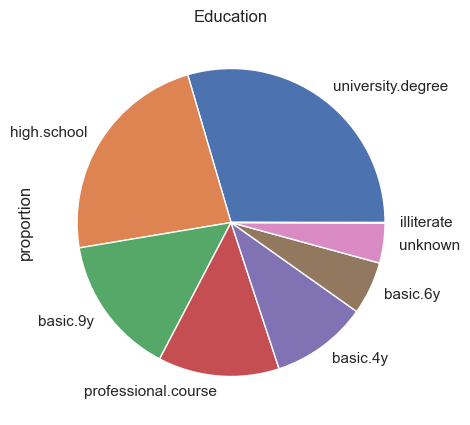

In [38]:
# Visualisasi education menggunakan Pie Chart
sns.set(rc={'figure.figsize':(5,5)})
display(df_train.education.value_counts(normalize = True)*100)
df_train.education.value_counts(normalize = True).plot(kind = 'pie')

plt.title('Education')
plt.show()

Berdasarkan record data, dari feature education sendiri ternyata kebanyakan pendidikan/pendidikan terakhir mereka adalah university degree mencapai 29.54%.

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

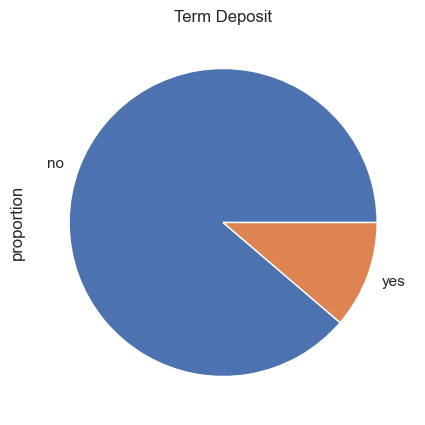

In [39]:
# Visualisasi feature y menggunakan Pie Chart
sns.set(rc={'figure.figsize':(5,5)})
display(df_train.y.value_counts(normalize = True)*100)
df_train.y.value_counts(normalize = True).plot(kind = 'pie')

plt.title('Term Deposit')
plt.show()

Ternyata tidak banyak klien yang berlangganan term deposito, yang berlangganan hanya sekitar 11.26%. Dari pie chart ini menunjukkan bahwa dataset pada targetnya tidak seimbang atau tidak balanced.

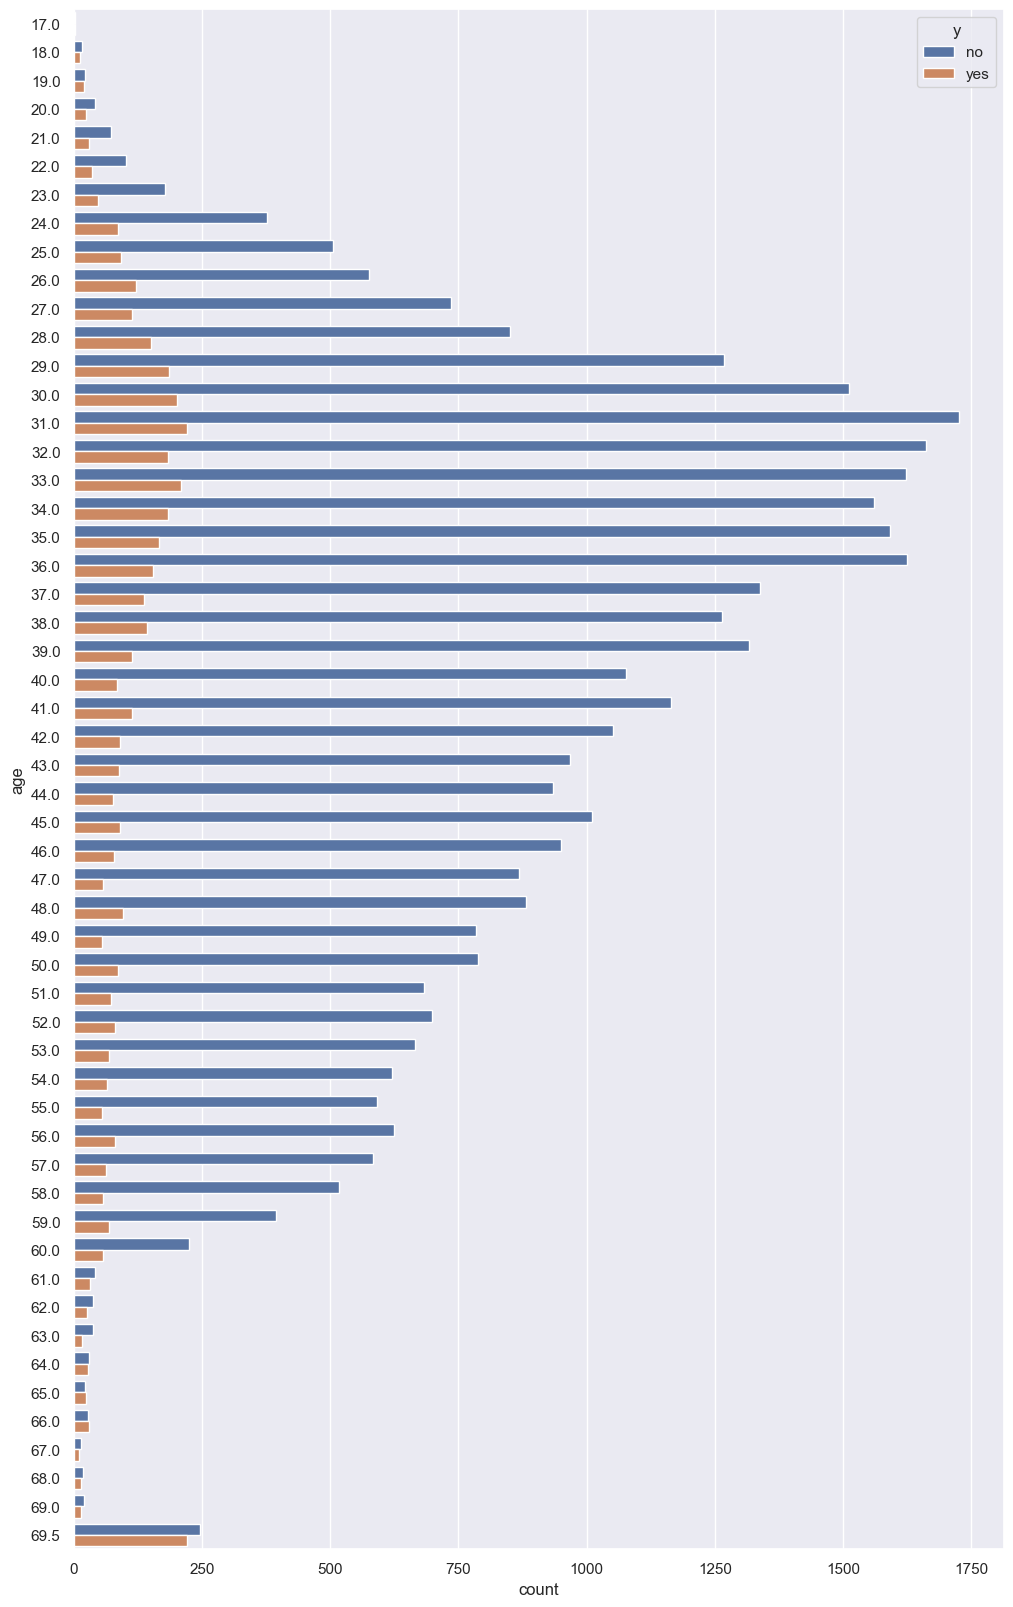

In [40]:
sns.set(rc={'figure.figsize':(12,20)})
sns.countplot(y = 'age', hue='y', data = df_train)
plt.show()

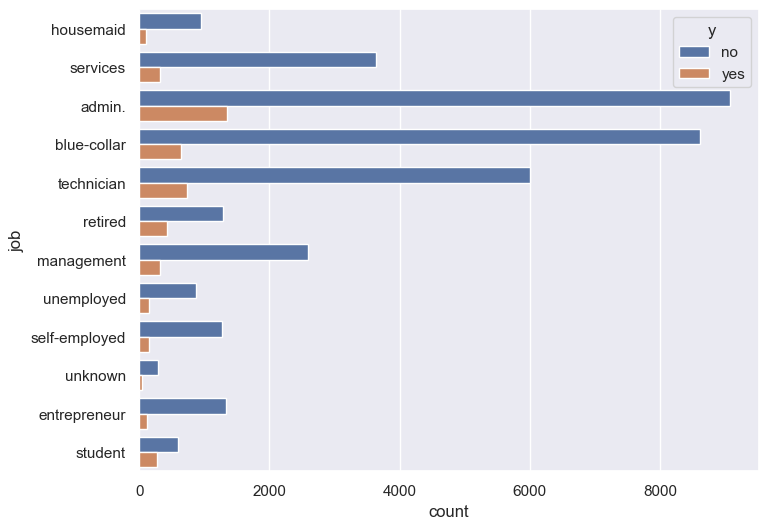

In [41]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(y = 'job', hue='y', data = df_train)
plt.show()

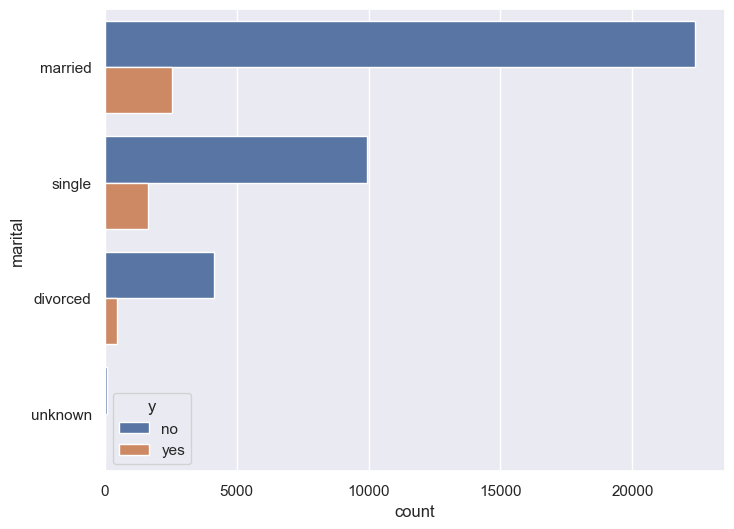

In [42]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(y = 'marital', hue='y', data = df_train)
plt.show()

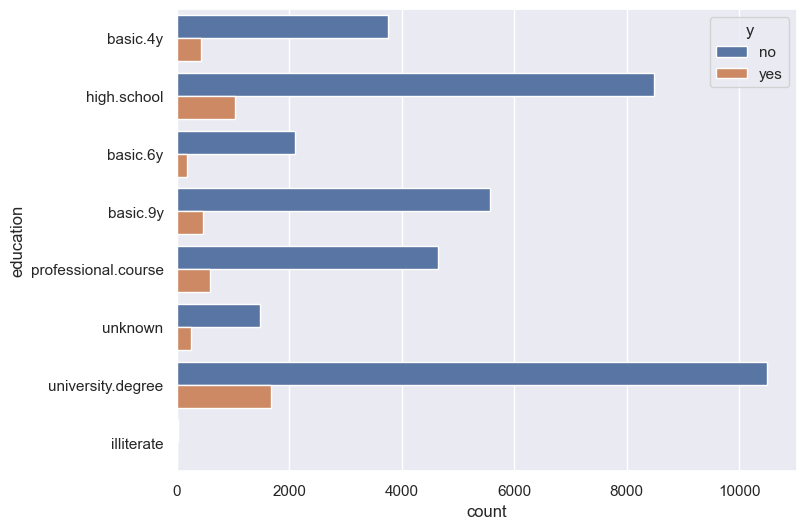

In [43]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(y = 'education', hue='y', data = df_train)
plt.show()

In [44]:
df_train.nunique()

age                54
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          646
campaign            6
pdays               1
previous            1
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [45]:
df_train.drop(['pdays', 'previous'], axis=1, inplace=True)

In [46]:
df_test.drop(['pdays', 'previous'], axis=1, inplace=True)

# __F. DATA PREPROCESSING__
-----------------------------------------------------------



## 1. Analisis Korelasi & Label Encod

In [47]:
# Transform data kategorik menjadi numerik
LabelEncoder = preprocessing.LabelEncoder()

for col in categorical_col:
    df_train[col] = LabelEncoder.fit_transform(df_train[col])
    df_test[col] = LabelEncoder.fit_transform(df_test[col])

In [48]:
boolean = ['y']

# Transform data boolean menjadi numerik
for col in boolean:
    df_train[col] = LabelEncoder.fit_transform(df_train[col])
    df_test[col] = LabelEncoder.fit_transform(df_test[col])

In [49]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,5,1,5,0,2,0,0,7,0,334.0,1,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [50]:
df_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,2,0,0,6,0,487,2,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,346,4,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,2,0,1,4,4,227,1,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,1,1,4,0,17,3,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,2,0,0,7,1,58,1,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,0,1,1,0,2,2,0,3,2,53,1,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39.0,0,1,3,0,2,0,1,3,0,219,1,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27.0,8,2,3,0,0,0,0,6,1,64,2,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58.0,0,1,3,0,0,0,0,1,0,528,1,1,1.4,93.444,-36.1,4.966,5228.1,0


<Axes: >

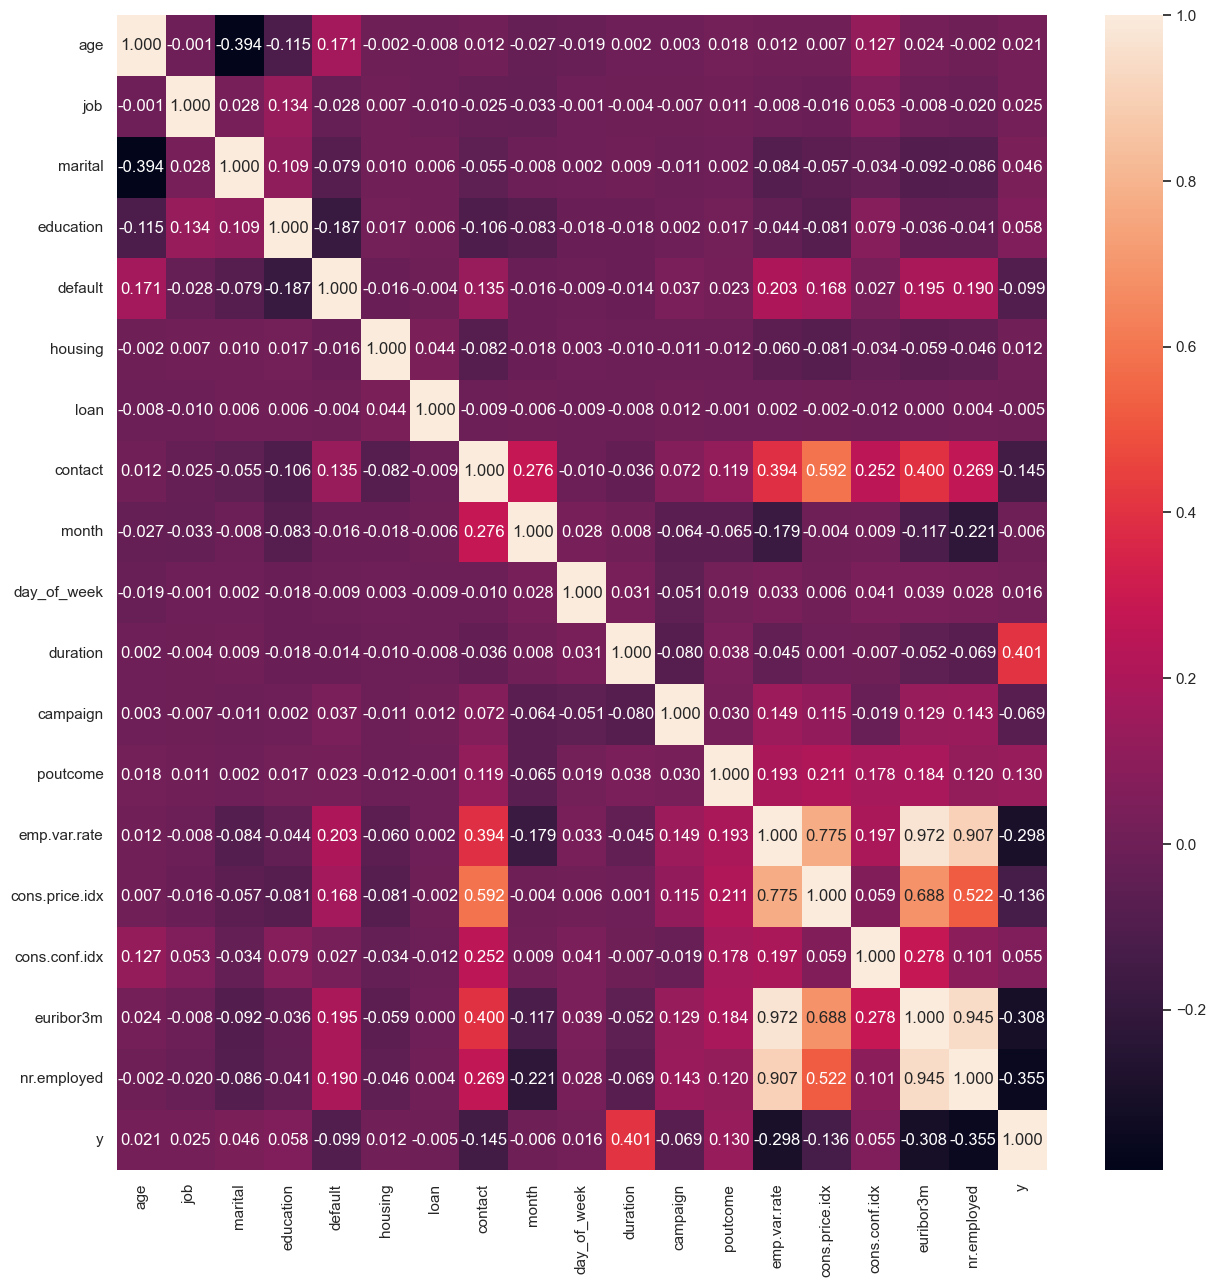

In [51]:
# Melihat korelasi antar fitur
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, fmt=".3f")

Feature yang digunakan adalah feature yang memiliki korelasi yang kuat dengan feature target, dan juga berdasarkan pertimbangan atau analisis lainnya, di antranya yaitu:
- age
- job
- marital
- education
- default
- housing
- contact
- day_of_week
- duration
- poutcome
- emp.var.rate
- cons.conf.idx
- y

In [52]:
df_train.drop(['euribor3m', 'nr.employed', 'cons.price.idx', 'default', 'loan', 'month', 'campaign'], axis=1, inplace=True)

In [53]:
df_test.drop(['euribor3m', 'nr.employed', 'cons.price.idx', 'default', 'loan', 'month', 'campaign'], axis=1, inplace=True)

In [54]:
df_train

,age,job,marital,education,housing,contact,day_of_week,duration,poutcome,emp.var.rate,cons.conf.idx,y
0,56.0,3,1,0,0,1,1,261.0,1,1.1,-36.4,0
1,57.0,7,1,3,0,1,1,149.0,1,1.1,-36.4,0
2,37.0,7,1,3,2,1,1,226.0,1,1.1,-36.4,0
3,40.0,0,1,1,0,1,1,151.0,1,1.1,-36.4,0
4,56.0,7,1,3,0,1,1,307.0,1,1.1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,5,1,5,2,0,0,334.0,1,-1.1,-50.8,1
41184,46.0,1,1,5,0,0,0,383.0,1,-1.1,-50.8,0
41185,56.0,5,1,6,2,0,0,189.0,1,-1.1,-50.8,0
41186,44.0,9,1,5,0,0,0,442.0,1,-1.1,-50.8,1


# G. PENDEFINISIAN DATA
--------------------------

   
Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya.

In [55]:
x = df_train.drop(columns=['y'])
y = df_train['y']

In [56]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [57]:
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [58]:
# Split Data Menggunakan SMOTE untuk mengatasi IMbalanced pada Target
smote = SMOTE()
x_s, y_s = smote.fit_resample(x, y)
xs_train, xs_test, ys_train, ys_test = train_test_split(x_s, y_s, test_size=0.3, random_state=42)

## 1. Logistic Regression

In [59]:
# Membuat model Logistik Regression
lr_model = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

# Membuat model Logistik Regression SMOTE
lr_model_s = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

## 2. K-Nearest Neighbors

In [60]:
# Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

# Membuat model K-Nearest Neighbors SMOTE
knn_model_s = KNeighborsClassifier(n_neighbors=16)

## 3. Support Vector Machine

In [61]:
# Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear', random_state= 42)

# Membuat model Support Vector Machine SMOTE
svm_model_s = svm.SVC(kernel='linear', random_state= 42)

## 4. Decision Tree

In [62]:
# Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Membuat model Decision Tree Classifier SMOTE
dtc_model_s = DecisionTreeClassifier(criterion='entropy', max_depth=3)

## 5. Random Forest

In [63]:
# Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

# Membuat model Random Forest Classifier SMOTE
rfc_model_s = RandomForestClassifier(n_estimators=100)

## 6. Naive Bayes

In [64]:
# Membuat model Naive Bayes
nb_model = GaussianNB()

# Membuat model Naive Bayes SMOTE
nb_model_s = GaussianNB()

# H. PELATIHAN MODEL
---------------------------------------------
    Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.


## 1. Logistic Regression

In [65]:
# Model Training Logistic Regression
lr_model = lr_model.fit(x_train, y_train)

# Model Training Logistic Regression SMOTE
lr_model_s = lr_model_s.fit(xs_train, ys_train)

## 2. K-Nearest Neighbors

In [66]:
# Model Training K-Nearest Neighbors
knn_model = knn_model.fit(x_train, y_train)

# Model Training K-Nearest Neighbors SMOTE
knn_model_s = knn_model_s.fit(xs_train, ys_train)

## 3. Support Vector Machine

In [67]:
# Model Training Support Vector Machine
svm_model = svm_model.fit(x_train, y_train)

# Model Training Support Vector Machine SMOTE
svm_model_s = svm_model_s.fit(xs_train, ys_train)

## 4. Decision Tree

In [68]:
# Model Training Decision Tree Classifier
dtc_model = dtc_model.fit(x_train, y_train)

# Model Training Decision Tree Classifier SMOTE
dtc_model_s = dtc_model_s.fit(xs_train, ys_train)

## 5. Random Forest

In [69]:
# Model Training Random Forest Classifier
rfc_model = rfc_model.fit(x_train, y_train)

# Model Training Random Forest Classifier SMOTE
rfc_model_s = rfc_model_s.fit(xs_train, ys_train)

## 6. Naive Bayes

In [70]:
# Model Training Naive Bayes
nb_model = nb_model.fit(x_train, y_train)

# Model Training Naive Bayes SMOTE
nb_model_s = nb_model_s.fit(xs_train, ys_train)

# I. EVALUASI MODEL
________________________________________

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Evaluasi menggunakan metode Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes sebagai berikut:

1. Akurasi (Accuracy): Akurasi mengukur sejauh mana model benar dalam mengklasifikasikan data. Ini adalah metrik umum untuk masalah klasifikasi.
2. Melihat Akurasi model.
3. Melihat hasil prediksi dan perbandingan dengan data aktual.
4. Membuat visualisasi regresi masing-masing kondisi.

## 1. Logistic Regression

### a). Tanpa Penanganan Imbalanced

In [71]:
y_pred_lr = lr_model.predict(x_test)
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
accuracy_score_lr

0.8988909576621064

### b). Imbalanced di Atasi

In [72]:
y_pred_lr_s = lr_model_s.predict(xs_test)
accuracy_score_lr_s = accuracy_score(ys_test, y_pred_lr_s)
accuracy_score_lr_s

0.8569082698535785

## 2. K-Nearest Neighbors

### a). Tanpa Penanganan Imbalanced

In [73]:
y_pred_knn = knn_model.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
accuracy_score_knn

0.8976766777301061

### b). Imbalanced di Atasi

In [74]:
y_pred_knn_s = knn_model_s.predict(xs_test)
accuracy_score_knn_s = accuracy_score(ys_test, y_pred_knn_s)
accuracy_score_knn_s

0.9007435113807417

## 3. Support Vector Machine

### a). Tanpa Penanganan Imbalanced

In [75]:
y_pred_svm = svm_model.predict(x_test)
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
accuracy_score_svm

0.8983242936938396

### b). Imbalanced di Atasi

In [76]:
y_pred_svm_s = svm_model_s.predict(xs_test)
accuracy_score_svm_s = accuracy_score(ys_test, y_pred_svm_s)
accuracy_score_svm_s

0.8576837111709164

## 4. Decision Tree

### a). Tanpa Penanganan Imbalanced

In [77]:
y_pred_dtc = dtc_model.predict(x_test)
accuracy_score_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_score_dtc

0.8912814700882377

### b). Imbalanced di Atasi

In [78]:
y_pred_dtc_s = dtc_model_s.predict(xs_test)
accuracy_score_dtc_s = accuracy_score(ys_test, y_pred_dtc_s)
accuracy_score_dtc_s

0.8480591159968982

## 5. Random Forest

### a). Tanpa Penanganan Imbalanced

In [79]:
y_pred_rfc = rfc_model.predict(x_test)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_score_rfc

0.9080385331498422

### b). Imbalanced di Atasi

In [80]:
y_pred_rfc_s = rfc_model_s.predict(xs_test)
accuracy_score_rfc_s = accuracy_score(ys_test, y_pred_rfc_s)
accuracy_score_rfc_s

0.9441226109565297

## 6. Naive Bayes

### a). Tanpa Penanganan Imbalanced

In [81]:
y_pred_nb = nb_model.predict(x_test)
accuracy_score_nb = accuracy_score(y_test, y_pred_nb)
accuracy_score_nb

0.8814053266413017

### b). Imbalanced di Atasi

In [82]:
y_pred_nb_s = nb_model_s.predict(xs_test)
accuracy_score_nb_s = accuracy_score(ys_test, y_pred_nb_s)
accuracy_score_nb_s

0.8090589791543128

In [83]:
list_pred = [y_pred_lr, y_pred_knn, y_pred_svm, y_pred_dtc, y_pred_rfc, y_pred_nb]

list_pred_s = [y_pred_lr_s, y_pred_knn_s, y_pred_svm_s, y_pred_dtc_s, y_pred_rfc_s, y_pred_nb_s]

list_model = ['Logistic Regression',
              'K-Nearest Neighbors',
              'Support Vector Machine',
              'Decision Tree',
              'Random Forest Classifier',
              'Naive Bayes']

## 7. F1 Score

In [84]:
for i in range(len(list_pred)):
  print('F1 score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], f1_score(y_test,list_pred[i])))
  print('F1 score dari model {} dengan SMOTE adalah {}'.format(list_model[i], f1_score(ys_test,list_pred_s[i])))
  print('============================================')

F1 score dari model Logistic Regression tanpa SMOTE adalah 0.4288980338363054
F1 score dari model Logistic Regression dengan SMOTE adalah 0.8606582863234576
F1 score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.37363726461843405
F1 score dari model K-Nearest Neighbors dengan SMOTE adalah 0.9066334849395005
F1 score dari model Support Vector Machine tanpa SMOTE adalah 0.30376940133037694
F1 score dari model Support Vector Machine dengan SMOTE adalah 0.8635170603674541
F1 score dari model Decision Tree tanpa SMOTE adalah 0.22235089751013318
F1 score dari model Decision Tree dengan SMOTE adalah 0.8634444307793219
F1 score dari model Random Forest Classifier tanpa SMOTE adalah 0.5531077891424077
F1 score dari model Random Forest Classifier dengan SMOTE adalah 0.9450598735255865
F1 score dari model Naive Bayes tanpa SMOTE adalah 0.5065678679690131
F1 score dari model Naive Bayes dengan SMOTE adalah 0.813125


## 8. Recall

In [85]:
for i in range(len(list_pred)):
  print('Recall score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], recall_score(y_test,list_pred[i])))
  print('Recall score dari model {} dengan SMOTE adalah {}'.format(list_model[i], recall_score(ys_test,list_pred_s[i])))
  print('============================================')

Recall score dari model Logistic Regression tanpa SMOTE adalah 0.32935393258426965
Recall score dari model Logistic Regression dengan SMOTE adalah 0.8892968606572426
Recall score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.26474719101123595
Recall score dari model K-Nearest Neighbors dengan SMOTE adalah 0.9697998898476226
Recall score dari model Support Vector Machine tanpa SMOTE adalah 0.19241573033707865
Recall score dari model Support Vector Machine dengan SMOTE adalah 0.9060033045713237
Recall score dari model Decision Tree tanpa SMOTE adalah 0.1348314606741573
Recall score dari model Decision Tree dengan SMOTE adalah 0.9666789058197173
Recall score dari model Random Forest Classifier tanpa SMOTE adalah 0.4936797752808989
Recall score dari model Random Forest Classifier dengan SMOTE adalah 0.9671378740591151
Recall score dari model Naive Bayes tanpa SMOTE adalah 0.5280898876404494
Recall score dari model Naive Bayes dengan SMOTE adalah 0.8359647512392142


## 9. Precision

In [86]:
for i in range(len(list_pred)):
  print('Precision score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], precision_score(y_test,list_pred[i])))
  print('Precision score dari model {} dengan SMOTE adalah {}'.format(list_model[i], precision_score(ys_test,list_pred_s[i])))
  print('============================================')

Precision score dari model Logistic Regression tanpa SMOTE adalah 0.6146788990825688
Precision score dari model Logistic Regression dengan SMOTE adalah 0.8338066959290816
Precision score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.6346801346801347
Precision score dari model K-Nearest Neighbors dengan SMOTE adalah 0.8511923944569771
Precision score dari model Support Vector Machine tanpa SMOTE adalah 0.7210526315789474
Precision score dari model Support Vector Machine dengan SMOTE adalah 0.8248370382751128
Precision score dari model Decision Tree tanpa SMOTE adalah 0.6336633663366337
Precision score dari model Decision Tree dengan SMOTE adalah 0.7801318616193792
Precision score dari model Random Forest Classifier tanpa SMOTE adalah 0.6288014311270125
Precision score dari model Random Forest Classifier dengan SMOTE adalah 0.923967377006051
Precision score dari model Naive Bayes tanpa SMOTE adalah 0.4867313915857605
Precision score dari model Naive Bayes dengan SMOTE adalah 0.7915

## 10. Classification Report

In [87]:
for i in range(len(list_pred)):
  print('=====================================================================')
  print('Classification report dari model {} tanpa menggunakan SMOTE'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(y_test,list_pred[i])))
  print('\n')
  print('=====================================================================')
  print('Classification report dari model {} dengan menggunakan SMOTE'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(ys_test,list_pred_s[i])))

Classification report dari model Logistic Regression tanpa menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10929
           1       0.61      0.33      0.43      1424

    accuracy                           0.90     12353
   macro avg       0.77      0.65      0.69     12353
weighted avg       0.88      0.90      0.89     12353



Classification report dari model Logistic Regression dengan menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     11029
           1       0.83      0.89      0.86     10894

    accuracy                           0.86     21923
   macro avg       0.86      0.86      0.86     21923
weighted avg       0.86      0.86      0.86     21923

Classification report dari model K-Nearest Neighbors tanpa menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10929
   

## 11. Confusion Matrix

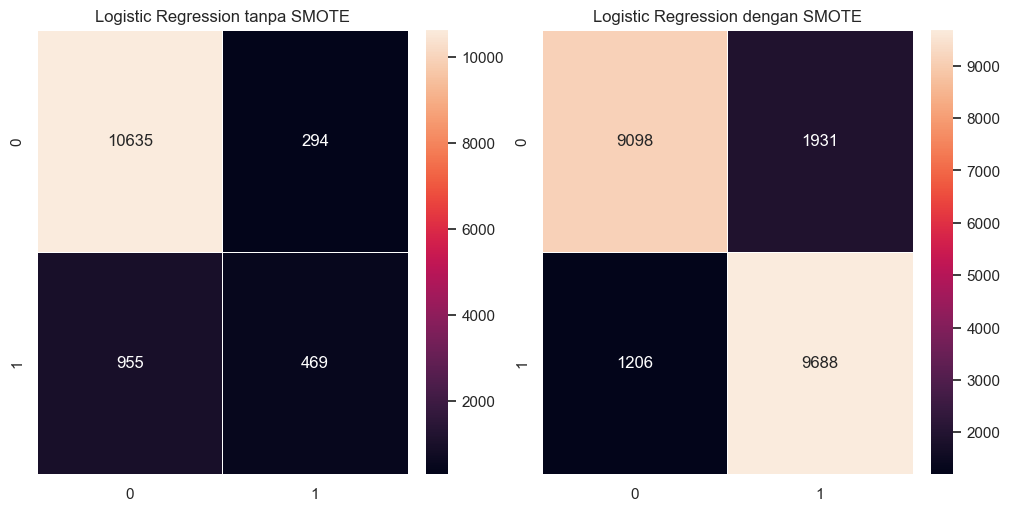

In [88]:
lrcm = confusion_matrix(y_test, y_pred_lr)
lrscm = confusion_matrix(ys_test, y_pred_lr_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(lrcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Logistic Regression tanpa SMOTE')
sns.heatmap(lrscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Logistic Regression dengan SMOTE')
plt.savefig("lrcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

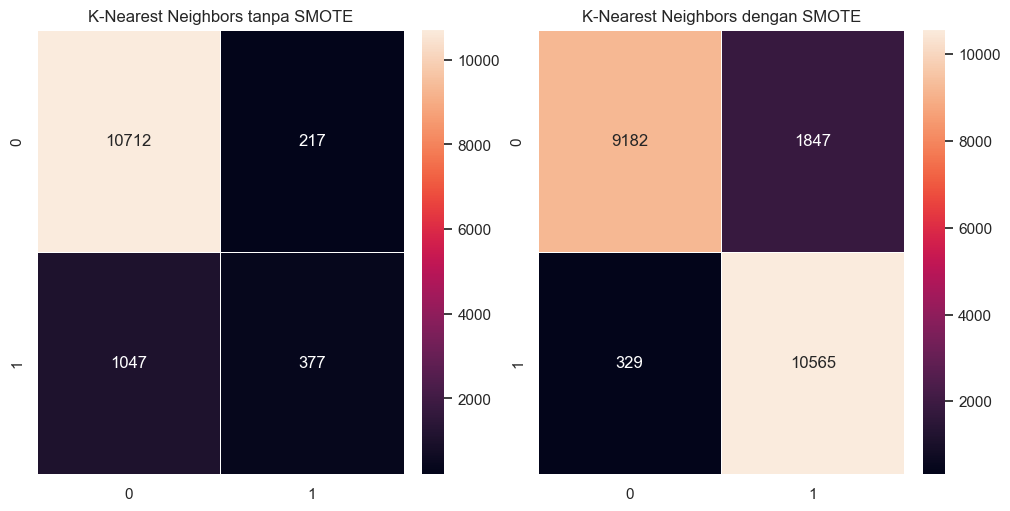

In [89]:
knncm = confusion_matrix(y_test, y_pred_knn)
knnscm = confusion_matrix(ys_test, y_pred_knn_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(knncm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('K-Nearest Neighbors tanpa SMOTE')
sns.heatmap(knnscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('K-Nearest Neighbors dengan SMOTE')
plt.savefig("knncm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

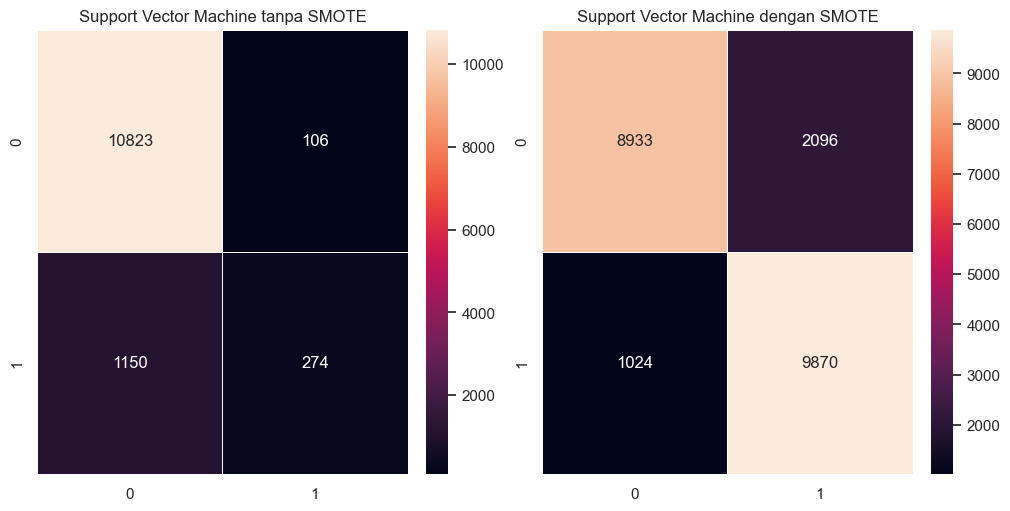

In [90]:
svmcm = confusion_matrix(y_test, y_pred_svm)
svmscm = confusion_matrix(ys_test, y_pred_svm_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(svmcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Support Vector Machine tanpa SMOTE')
sns.heatmap(svmscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Support Vector Machine dengan SMOTE')
plt.savefig("svmcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

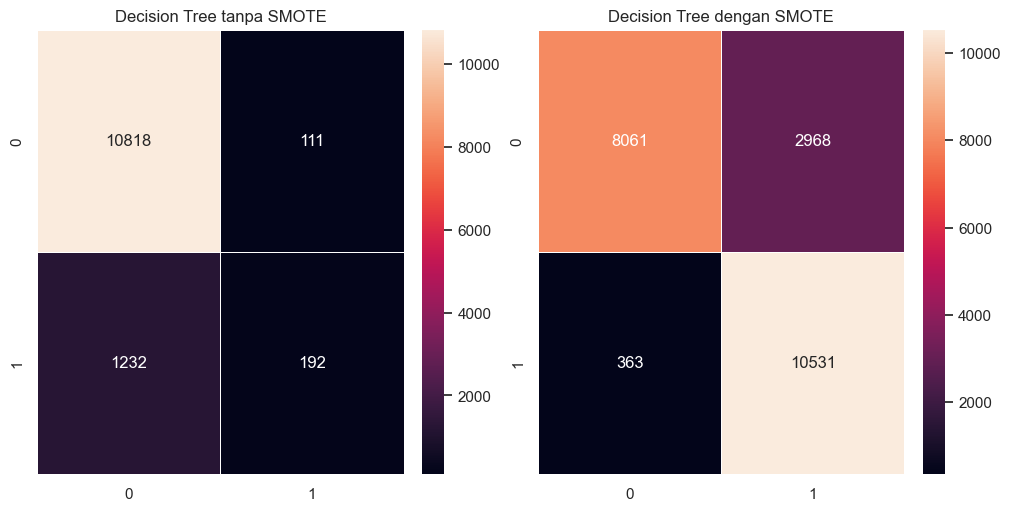

In [91]:
dtccm = confusion_matrix(y_test, y_pred_dtc)
dtcscm = confusion_matrix(ys_test, y_pred_dtc_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(dtccm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Decision Tree tanpa SMOTE')
sns.heatmap(dtcscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Decision Tree dengan SMOTE')
plt.savefig("dtccm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

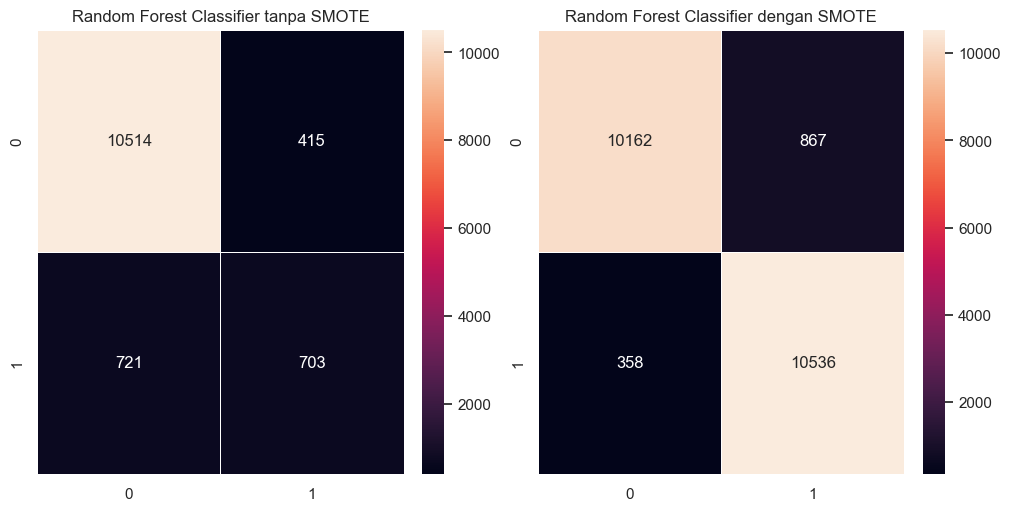

In [92]:
rfccm = confusion_matrix(y_test, y_pred_rfc)
rfcscm = confusion_matrix(ys_test, y_pred_rfc_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(rfccm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Random Forest Classifier tanpa SMOTE')
sns.heatmap(rfcscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Random Forest Classifier dengan SMOTE')
plt.savefig("rfccm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

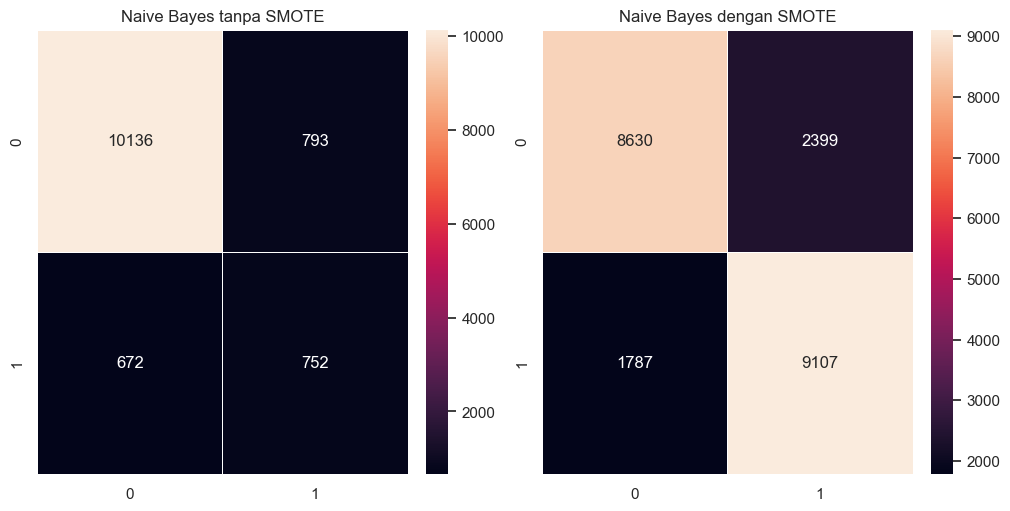

In [93]:
nbcm = confusion_matrix(y_test, y_pred_nb)
nbscm = confusion_matrix(ys_test, y_pred_nb_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(nbcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Naive Bayes tanpa SMOTE')
sns.heatmap(nbscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Naive Bayes dengan SMOTE')
plt.savefig("nbcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [94]:
def finding_max(list_pred,y_test,type_pred=None):
  predicted_value = []
  for index,pred in enumerate(list_pred):
    if(type_pred == 'accuracy'):
      predicted_value.append(accuracy_score(y_test,pred))
    elif(type_pred == 'recall'):
      predicted_value.append(recall_score(y_test,pred))
    elif(type_pred == 'precision'):
      predicted_value.append(precision_score(y_test,pred))
    elif(type_pred == 'f1'):
      predicted_value.append(f1_score(y_test,pred))
  return predicted_value.index(max(predicted_value)),max(predicted_value)

In [95]:
best_accuracy = finding_max(list_pred,y_test,'accuracy')
best_accuracy_s = finding_max(list_pred_s,ys_test,'accuracy')

best_recall = finding_max(list_pred,y_test,'recall')
best_recall_s = finding_max(list_pred_s,ys_test,'recall')

best_precision = finding_max(list_pred,y_test,'precision')
best_precision_s = finding_max(list_pred_s,ys_test,'precision')

best_f1 = finding_max(list_pred,y_test,'f1')
best_f1_s = finding_max(list_pred_s,ys_test,'f1')

print('====================================')
print('Model yang di-training tanpa SMOTE')
print('====================================')
print(f'Model yang memiliki Accuracy Score tinggi adalah {list_model[best_accuracy[0]]} dengan nilai accuracy Score {best_accuracy[1]}')
print(f'Model yang memiliki Precision Score tinggi adalah {list_model[best_precision[0]]} dengan nilai precision Score {best_precision[1]}')
print(f'Model yang memiliki Recall Score tinggi adalah {list_model[best_recall[0]]} dengan nilai recall Score {best_recall[1]}')
print(f'Model yang memiliki F1 Score tinggi adalah {list_model[best_f1[0]]} dengan nilai F1 Score {best_f1[1]}')
print('\n')
print('====================================')
print('Model yang di-training dengan SMOTE')
print('====================================')
print(f'Model yang memiliki Accuracy Score tinggi adalah {list_model[best_accuracy_s[0]]} dengan nilai accuracy Score {best_accuracy_s[1]}')
print(f'Model yang memiliki Precision Score tinggi adalah {list_model[best_precision_s[0]]} dengan nilai precision Score {best_precision_s[1]}')
print(f'Model yang memiliki Recall Score tinggi adalah {list_model[best_recall_s[0]]} dengan nilai recall Score {best_recall_s[1]}')
print(f'Model yang memiliki F1 Score tinggi adalah {list_model[best_f1_s[0]]} dengan nilai F1 Score {best_f1_s[1]}')

Model yang di-training tanpa SMOTE
Model yang memiliki Accuracy Score tinggi adalah Random Forest Classifier dengan nilai accuracy Score 0.9080385331498422
Model yang memiliki Precision Score tinggi adalah Support Vector Machine dengan nilai precision Score 0.7210526315789474
Model yang memiliki Recall Score tinggi adalah Naive Bayes dengan nilai recall Score 0.5280898876404494
Model yang memiliki F1 Score tinggi adalah Random Forest Classifier dengan nilai F1 Score 0.5531077891424077


Model yang di-training dengan SMOTE
Model yang memiliki Accuracy Score tinggi adalah Random Forest Classifier dengan nilai accuracy Score 0.9441226109565297
Model yang memiliki Precision Score tinggi adalah Random Forest Classifier dengan nilai precision Score 0.923967377006051
Model yang memiliki Recall Score tinggi adalah K-Nearest Neighbors dengan nilai recall Score 0.9697998898476226
Model yang memiliki F1 Score tinggi adalah Random Forest Classifier dengan nilai F1 Score 0.9450598735255865


# J. MODEL INFERENCE
-------------------------------------


In [96]:
df_test.drop(['y'], axis=1, inplace=True)

dt_trial = df_test
dt_trial

,age,job,marital,education,housing,contact,day_of_week,duration,poutcome,emp.var.rate,cons.conf.idx
0,30.0,1,1,2,2,0,0,487,1,-1.8,-46.2
1,39.0,7,2,3,0,1,0,346,1,1.1,-36.4
2,25.0,7,1,3,2,1,4,227,1,1.4,-41.8
3,38.0,7,1,2,1,1,0,17,1,1.4,-41.8
4,47.0,0,1,6,2,0,1,58,1,-0.1,-42.0
...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,0,1,1,2,0,2,53,1,1.4,-42.7
4115,39.0,0,1,3,2,1,0,219,1,1.4,-42.7
4116,27.0,8,2,3,0,0,1,64,0,-1.8,-46.2
4117,58.0,0,1,3,0,0,0,528,1,1.4,-36.1


In [97]:
dt_trial = scaler.fit_transform(dt_trial)

In [98]:
pred_lr_minf = lr_model.predict(dt_trial)
pred_lr_s_minf = lr_model_s.predict(dt_trial)
pred_knn_minf = knn_model.predict(dt_trial)
pred_knn_s_minf = knn_model_s.predict(dt_trial)
pred_svm_minf = svm_model.predict(dt_trial)
pred_svm_s_minf = svm_model_s.predict(dt_trial)
pred_dtc_minf = dtc_model.predict(dt_trial)
pred_dtc_s_minf = dtc_model_s.predict(dt_trial)
pred_rfc_minf = rfc_model.predict(dt_trial)
pred_rfc_s_minf = rfc_model_s.predict(dt_trial)
pred_nb_minf = nb_model.predict(dt_trial)
pred_nb_s_minf = nb_model_s.predict(dt_trial)

print("Logistic Regression Model = ", pred_lr_minf)
print("Logistic Regression Model SMOTE = ", pred_lr_s_minf)
print("K-Nearest Neighbors Model = ", pred_knn_minf)
print("K-Nearest Neighbors Model SMOTE = ", pred_knn_s_minf)
print("Support Virtual Machine Model = ", pred_svm_minf)
print("Support Virtual Machine Model SMOTE = ", pred_svm_s_minf)
print("Decision Tree Model = ", pred_dtc_minf)
print("Decision Tree Model SMOTE = ", pred_dtc_s_minf)
print("Random Forest Model = ", pred_rfc_minf)
print("Random Forest Model SMOTE = ", pred_rfc_s_minf)
print("Naive Bayes Model = ", pred_nb_minf)
print("Naive Bayes Model SMOTE = ", pred_nb_s_minf)

Logistic Regression Model =  [0 0 0 ... 0 0 0]
Logistic Regression Model SMOTE =  [1 0 0 ... 0 1 0]
K-Nearest Neighbors Model =  [0 0 0 ... 0 0 0]
K-Nearest Neighbors Model SMOTE =  [1 0 0 ... 0 1 0]
Support Virtual Machine Model =  [0 0 0 ... 0 0 0]
Support Virtual Machine Model SMOTE =  [1 0 0 ... 0 1 0]
Decision Tree Model =  [0 0 0 ... 0 0 0]
Decision Tree Model SMOTE =  [1 0 0 ... 0 1 1]
Random Forest Model =  [0 0 0 ... 0 0 0]
Random Forest Model SMOTE =  [1 0 0 ... 1 0 0]
Naive Bayes Model =  [0 0 0 ... 0 0 0]
Naive Bayes Model SMOTE =  [1 0 0 ... 1 1 0]


# K. Pengambilan Kesimpulan
-----------------------------------------------------
Pada final project ini dilakukan pemodelan menggunakan **Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes** untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). Berdasarkan data target (y) ternyata terjadi ketidak seimbangan data tersebut atau disebut dengan imbalanced data, sehingga dilakukan percobaan model dengan data yang di atasi imbalancednya dan dengan data yang tanpa di atasi permasalahan imbalancednya. Setelah dilakukan training dan evaluasi model, didapatkan hasil:

=========================================================
-----------------------------------------------------
**`F1 SCORE`**
-----------------------------------------------------
F1 score dari model Logistic Regression tanpa SMOTE adalah 0.4288980338363054
F1 score dari model Logistic Regression dengan SMOTE adalah 0.8607910308315166

F1 score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.37363726461843405
F1 score dari model K-Nearest Neighbors dengan SMOTE adalah 0.9054790406315699

F1 score dari model Support Vector Machine tanpa SMOTE adalah 0.30376940133037694
F1 score dari model Support Vector Machine dengan SMOTE adalah 0.8634731587704703

F1 score dari model Decision Tree tanpa SMOTE adalah 0.22235089751013318
F1 score dari model Decision Tree dengan SMOTE adalah 0.854647590625823

F1 score dari model Random Forest Classifier tanpa SMOTE adalah 0.5488958990536278
F1 score dari model Random Forest Classifier dengan SMOTE adalah 0.9436436301585164

F1 score dari model Naive Bayes tanpa SMOTE adalah 0.5065678679690131
F1 score dari model Naive Bayes dengan SMOTE adalah 0.811277690758559

=========================================================
---------------------------------------------------------
**``RECALL``**
---------------------------------------------------------
Recall score dari model Logistic Regression tanpa SMOTE adalah 0.32935393258426965
Recall score dari model Logistic Regression dengan SMOTE adalah 0.8880117495869286

Recall score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.26474719101123595
Recall score dari model K-Nearest Neighbors dengan SMOTE adalah 0.9686065724251882

Recall score dari model Support Vector Machine tanpa SMOTE adalah 0.19241573033707865
Recall score dari model Support Vector Machine dengan SMOTE adalah 0.905085368092528

Recall score dari model Decision Tree tanpa SMOTE adalah 0.1348314606741573
Recall score dari model Decision Tree dengan SMOTE adalah 0.8937947494033412

Recall score dari model Random Forest Classifier tanpa SMOTE adalah 0.4887640449438202
Recall score dari model Random Forest Classifier dengan SMOTE adalah 0.9644758582706077

Recall score dari model Naive Bayes tanpa SMOTE adalah 0.5280898876404494
Recall score dari model Naive Bayes dengan SMOTE adalah 0.8320176243803928

=========================================================
---------------------------------------------------------
**``PRECISION``**
---------------------------------------------------------
Precision score dari model Logistic Regression tanpa SMOTE adalah 0.6146788990825688
Precision score dari model Logistic Regression dengan SMOTE adalah 0.8351895018561685

Precision score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.6346801346801347
Precision score dari model K-Nearest Neighbors dengan SMOTE adalah 0.8500765326673648

Precision score dari model Support Vector Machine tanpa SMOTE adalah 0.7210526315789474
Precision score dari model Support Vector Machine dengan SMOTE adalah 0.8255190890823845

Precision score dari model Decision Tree tanpa SMOTE adalah 0.6336633663366337
Precision score dari model Decision Tree dengan SMOTE adalah 0.81878573831147

Precision score dari model Random Forest Classifier tanpa SMOTE adalah 0.6258992805755396
Precision score dari model Random Forest Classifier dengan SMOTE adalah 0.9236923076923077

Precision score dari model Naive Bayes tanpa SMOTE adalah 0.4867313915857605
Precision score dari model Naive Bayes dengan SMOTE adalah 0.7915465898174832

=========================================================
---------------------------------------------------------

---------------------------------------------------------
a). Model yang di-training tanpa SMOTE

Model yang memiliki Accuracy Score tinggi adalah Random Forest Classifier dengan nilai accuracy Score 0.9073909171861086
Model yang memiliki Precision Score tinggi adalah Support Vector Machine dengan nilai precision Score 0.7210526315789474
Model yang memiliki Recall Score tinggi adalah Naive Bayes dengan nilai recall Score 0.5280898876404494
Model yang memiliki F1 Score tinggi adalah Random Forest Classifier dengan nilai F1 Score 0.5488958990536278


b). Model yang di-training dengan SMOTE

Model yang memiliki Accuracy Score tinggi adalah Random Forest Classifier dengan nilai accuracy Score 0.9427541851024038
Model yang memiliki Precision Score tinggi adalah Random Forest Classifier dengan nilai precision Score 0.9236923076923077
Model yang memiliki Recall Score tinggi adalah K-Nearest Neighbors dengan nilai recall Score 0.9686065724251882
Model yang memiliki F1 Score tinggi adalah Random Forest Classifier dengan nilai F1 Score 0.9436436301585164

-----------------------------------------------------

Berdasarkan hasil tersebut, dapat disimpulkan bahwa:
- Dari ke 6 model yang dibuat ternyata model Random Forest Classifier merupakan model terbaik dengan di atasi terlebih dahulu permasalahan data imbalanced (keseimbangan data) nya. Karena jika melihat berdasarkan nilai acuracy score nya akan lebih efektif jika data seimbang.

-----------------------------------------------------